# FYS-STK4155 - Project 1 Notebook

In [357]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
plt.rcParams.update({'text.usetex': True, 'font.size': 16, 'font.family': 'serif', 'font.serif': 'Computer Modern Sans Serif', 'font.weight': 100, 'mathtext.fontset': 'cm', 'xtick.labelsize': 14, 'ytick.labelsize': 14})
from functions import *

# seed = np.random.randint(1,1000)
seed = 43
np.random.seed(seed)

## a)

In [561]:
x = np.arange(1, 3)
y = np.arange(1, 4)
n = 2
X_expected = np.array([[1, 1, 1, 1, 1, 1], 
                       [1, 2, 1, 2, 1, 2], 
                       [1, 1, 2, 2, 3, 3], 
                       [1, 4, 1, 4, 1, 4],
                       [1, 2, 2, 4, 3, 6],
                       [1, 1, 4, 4, 9, 9]])
print(X_expected.T)

N_x = len(x)
N_y = len(y)
l = int(3 + np.sum(range(3, n+2)))
X = np.ones((int(N_x*N_y), l))

xx, yy = np.meshgrid(x, y)
xx = xx.flatten()
yy = yy.flatten()

idx = 1
for i in range(1, n+1):
    # following signature? 1 x y x^2 xy y^2 x^3 x^2y xy^2 y^3 x^4 x^3y x^2y^2 xy^3 y^4 ?
    for j in range(i+1):
        X[:, idx] = xx**(i-j)*yy**j
        idx += 1

print(X)

[[1 1 1 1 1 1]
 [1 2 1 4 2 1]
 [1 1 2 1 2 4]
 [1 2 2 4 4 4]
 [1 1 3 1 3 9]
 [1 2 3 4 6 9]]
[[1. 1. 1. 1. 1. 1.]
 [1. 2. 1. 4. 2. 1.]
 [1. 1. 2. 1. 2. 4.]
 [1. 2. 2. 4. 4. 4.]
 [1. 1. 3. 1. 3. 9.]
 [1. 2. 3. 4. 6. 9.]]


In [678]:
x = np.arange(1, 4)
y = np.arange(1, 4)
n = 3

xx = np.array([1, 2, 3, 1, 2, 3, 1, 2, 3])
yy = np.array([1, 1, 1, 2, 2, 2, 3, 3, 3])
X_expected = np.array([np.ones(9), xx, yy, xx**2, xx*yy, yy**2, xx**3, xx**2*yy, xx*yy**2, yy**3])
print(X_expected.T)

N_x = len(x)
N_y = len(y)
l = int(3 + np.sum(range(3, n+2)))
X = np.ones((int(N_x*N_y), l))

xx, yy = np.meshgrid(x, y)
xx = xx.flatten()
yy = yy.flatten()

idx = 1
for i in range(1, n+1):
    # following signature? 1 x y x^2 xy y^2 x^3 x^2y xy^2 y^3 x^4 x^3y x^2y^2 xy^3 y^4 ?
    for j in range(i+1):
        X[:, idx] = xx**(i-j)*yy**j
        idx += 1

print(X)

[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  2.  1.  4.  2.  1.  8.  4.  2.  1.]
 [ 1.  3.  1.  9.  3.  1. 27.  9.  3.  1.]
 [ 1.  1.  2.  1.  2.  4.  1.  2.  4.  8.]
 [ 1.  2.  2.  4.  4.  4.  8.  8.  8.  8.]
 [ 1.  3.  2.  9.  6.  4. 27. 18. 12.  8.]
 [ 1.  1.  3.  1.  3.  9.  1.  3.  9. 27.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]
 [ 1.  3.  3.  9.  9.  9. 27. 27. 27. 27.]]
[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  2.  1.  4.  2.  1.  8.  4.  2.  1.]
 [ 1.  3.  1.  9.  3.  1. 27.  9.  3.  1.]
 [ 1.  1.  2.  1.  2.  4.  1.  2.  4.  8.]
 [ 1.  2.  2.  4.  4.  4.  8.  8.  8.  8.]
 [ 1.  3.  2.  9.  6.  4. 27. 18. 12.  8.]
 [ 1.  1.  3.  1.  3.  9.  1.  3.  9. 27.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]
 [ 1.  3.  3.  9.  9.  9. 27. 27. 27. 27.]]


In [688]:
def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

def MSE(y, y_tilde):
    n = len(y)
    return np.sum((y - y_tilde)**2) / n

def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model)**2) / np.sum((y_data - np.mean(y_data))**2)

def create_X(x, y, n):
	if len(x.shape) > 1:
		x = np.ravel(x)
		y = np.ravel(y)

	# N = len(x)
	# l = int((n+1)*(n+2)/2)		# Number of elements in beta
	# X = np.ones((N, N, l))

	# for i in range(1,n+1):
	# 	q = int((i)*(i+1)/2)
	# 	for k in range(i+1):
	# 		X[:,q+k] = (x**(i-k))*(y**k)

	# there are l columns, where l is the size of beta (the number of features)
	# there are N_x*N_y rows, where N_x is the number of data points in the x-direction and N_y the number in the y-direction
	# if we have N_x = 2 and N_y = 3, the first columns of X look the following way:
	# [1 1 1 1 1 1]
	# [x0 x0 x0 x1 x1 x1]
	# [y0 y1 y2 y0 y1 y2]
	# [x0^2 x0^2 x0^2 x1^2 x1^2 x1^2]
	# [y0^2 y1^2 y2^2 y0^2 y1^2 y2^2]
	# [x0y0 x0y1 x0y2 x1y0 x1y1 x1y2]
	# this is equivalent(?) to the last four columns being written in the following way
	# [x0 x1 x0 x1 x0 x1]
	# [y0 y0 y1 y1 y2 y2]
	# [x0^2 x1^2 x0^2 x1^2 x0^2 x1^2]
	# [y0^2 y0^2 y1^2 y1^2 y2^2 y2^2]
	# [x0y0 x1y0 x0y1 x1y1 x0y2 x1y2]
	# the beta vector is then [β0 β1 β2 β3 β4 β5]
	# if we want a 1st degree polynomial we need 3 features. for a 2nd deg poly we need 6. for a 3rd we need to include x^3, y^3, x^2y and xy^2, so we have 10 features. for 4th degree we include x^4, y^4, x^3y, x^2y^2, xy^3, etc so we need 1 + sum_ded(deg+1)

	N_x = len(x)
	N_y = len(y)
	l = int(3 + np.sum(range(3, n+2)))
	X = np.ones((int(N_x*N_y), l))

	xx, yy = np.meshgrid(x, y)
	# yy, xx = np.meshgrid(y, x)
	xx = xx.flatten()
	yy = yy.flatten()

	idx = 1
	for i in range(1, n+1):
		# following signature? 1 x y x^2 xy y^2 x^3 x^2y xy^2 y^3 x^4 x^3y x^2y^2 xy^3 y^4 ?
		for j in range(i+1):
			X[:, idx] = xx**(i-j)*yy**j
			idx += 1

	return X

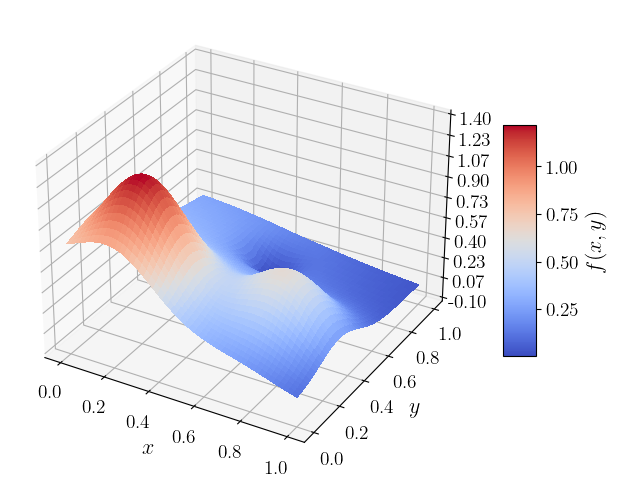

In [351]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(projection="3d")

n = 5
N = 2000
x = np.arange(0, 1, 1/N)
y = np.arange(0, 1, 1/N)
x, y = np.meshgrid(x, y)

z = FrankeFunction(x, y)
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
fig.colorbar(surf, shrink=0.5, aspect=7, label=r"$f(x,y)$")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
plt.savefig("../figs/a_Franke_surf.pdf")
plt.show()

In [616]:
N = 50
x = np.arange(0, 1, 1/N)
y = np.arange(0, 1, 1/N)
xx, yy = np.meshgrid(x, y)
x.reshape(-1, 1); y.reshape(-1, 1) 
z = (FrankeFunction(xx, yy) + np.random.normal(0, 0.1, (N, N))).reshape(-1, 1) 

MSE_raw = []
MSE_scaled = []
R2_raw = []
R2_scaled = []
β_raw_list = []
β_scaled_list = []

degrees = range(1, 6)
for degree in degrees:
    X = create_X(x, y, n=degree)
    X_train, X_test, y_train, y_test = train_test_split(X, z, test_size=0.2, random_state=seed)

    # Raw
    β_raw = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ y_train
    β_raw_list.append(β_raw)
    y_tilde_raw = X_train @ β_raw 
    y_pred_raw = X_test @ β_raw
    
    MSE_raw.append(MSE(y_test, y_pred_raw))
    R2_raw.append(R2(y_test, y_pred_raw))
    
    # Scaled
    scaler_X = StandardScaler().fit(X_train)
    X_train_scaled = scaler_X.transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)

    scaler_y = StandardScaler().fit(y_train)
    y_train_scaled = scaler_y.transform(y_train)
    y_test_scaled = scaler_y.transform(y_test)

    β_scaled = np.linalg.pinv(X_train_scaled.T @ X_train_scaled) @ X_train_scaled.T @ y_train_scaled
    β_scaled[0] = 0
    β_scaled_list.append(β_scaled)
    y_tilde_scaled = X_train_scaled @ β_scaled 
    y_pred_scaled = X_test_scaled @ β_scaled
    
    MSE_scaled.append(MSE(y_train_scaled, y_tilde_scaled))
    R2_scaled.append(R2(y_test_scaled, y_pred_scaled))

MSE(R2_raw, R_scaled) = 5.37e-25


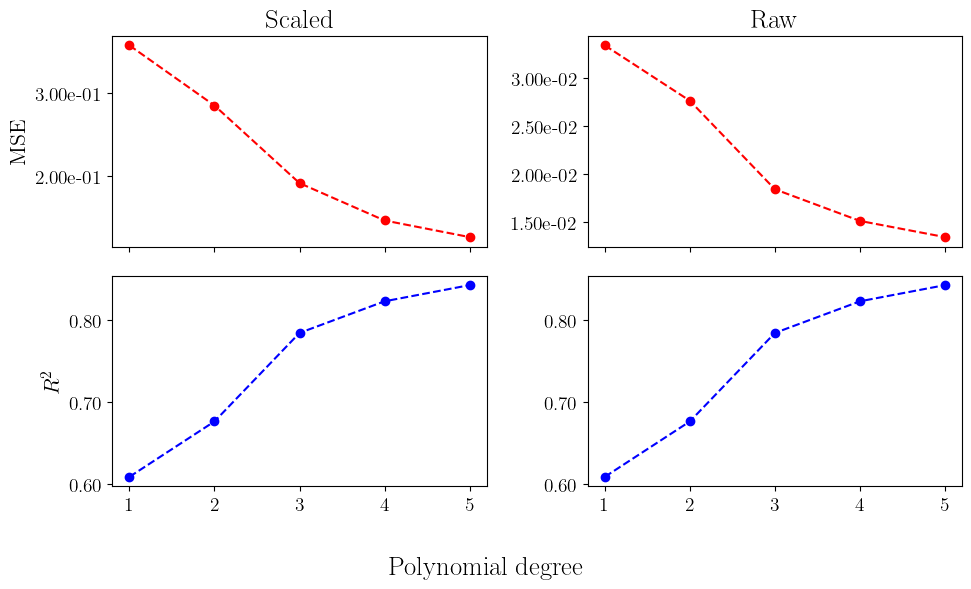

In [617]:
fig, (ax1, ax2) = plt.subplots(2, 2, sharex=True, figsize = (10, 6))

# Plotting in grid
ax1[0].plot(degrees, MSE_scaled, "r--o")
ax1[0].set_title("Scaled")

ax1[1].plot(degrees, MSE_raw, "r--o")
ax1[1].set_title("Raw")

ax2[0].plot(degrees, R2_scaled, "b--o")
ax2[1].plot(degrees, R2_raw, "b--o")

print(f'MSE(R2_raw, R_scaled) = {MSE(np.array(R2_raw), np.array(R2_scaled)):.2e}') # Almost equal

# Prettifying
## Formatting y-labels
ax1[0].yaxis.set_major_formatter(FormatStrFormatter("%.2e"))
ax1[1].yaxis.set_major_formatter(FormatStrFormatter("%.2e"))

ax2[0].yaxis.set_major_formatter(FormatStrFormatter("%.2f%%"))
ax2[1].yaxis.set_major_formatter(FormatStrFormatter("%.2f%%"))

## Axis labels
ax1[0].set_ylabel('MSE')
ax2[0].set_ylabel(r'$R^2$')
fig.supxlabel('Polynomial degree')

# plt.suptitle("Comparing Error in Scaled and Raw Data")
plt.tight_layout()
plt.savefig("../figs/a_error_scaled_vs_raw.pdf")
plt.show()

In [6]:
#TODO update comments after fixed MSE func

### Comment on Plot
- We get less errors with scaled data, by three orders of magnitude. 
- MSE is very low until we reach 4th degree polynomial for the scaled data, while for the unscaled data it is low until we reach 5th degree polynomial.
- The R2 score increases with the degree of the polynomial for both scaled and unscaled data, and have a MSE ∝ $10^{-11}$

MSE between first and last row:  0.00e+00
MSE between first and last row:  0.00e+00
MSE between first and last row:  0.00e+00
MSE between first and last row:  0.00e+00
MSE between first and last row:  0.00e+00


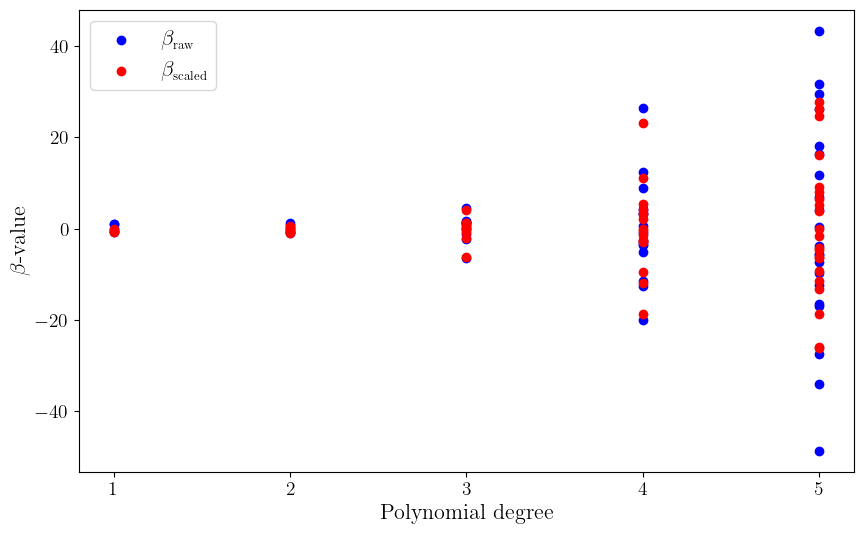

In [618]:
plt.figure(figsize = (10, 6))
for i, deg in enumerate(degrees):
    diff = MSE(β_raw_list[i][:, 0], β_raw_list[i][:, -1]) # Comparing first and last row
    print(f'MSE between first and last row: {diff: .2e}')
    m = len(β_raw_list[i][:, 0]) # Choice of row in β makes basically no difference
    plt.scatter([deg]*m, β_raw_list[i][:, 0], c='blue')
    plt.scatter([deg]*m, β_scaled_list[i][:, 0], c='red')

# Single data point for labels
plt.scatter(1, β_raw_list[0][0, 0], c='blue', label=r"$\beta_{\small\textrm{raw}}$")
plt.scatter(1, β_scaled_list[0][0, 0], c='red', label=r"$\beta_{\small\textrm{scaled}}$")

#TODO - or + in exponent?
# plt.title(r"First Column of $\beta$-values for Scaled and Raw Data" + "\n" + r"Negligible MSE $\propto 10^{-5\pm1}$ Between Columns")
plt.xlabel("Polynomial degree")
plt.ylabel(r'$\beta$-value')
plt.xticks([i for i in degrees], [str(i) for i in degrees])
plt.legend()
plt.savefig("../figs/a_beta_scaled_vs_raw.pdf")
plt.show()

In [ ]:
#TODO why so large betas?

### Comment on Plot
- As we increase the degree of the polynomial, we see a wider range of $β$-values. 
- The scaled values are consistently tighter in spread than the raw values.
- There are a small difference in β-values in each row of the β-matrices, but the difference is non significant.
- Difference in β-values from each row is most likely due to the use of pseudo-inverse in the OLS estimation.

#### Open Questions
- What does this mean for the model?
- Is pinv the cause of the difference in β-values?

## b)

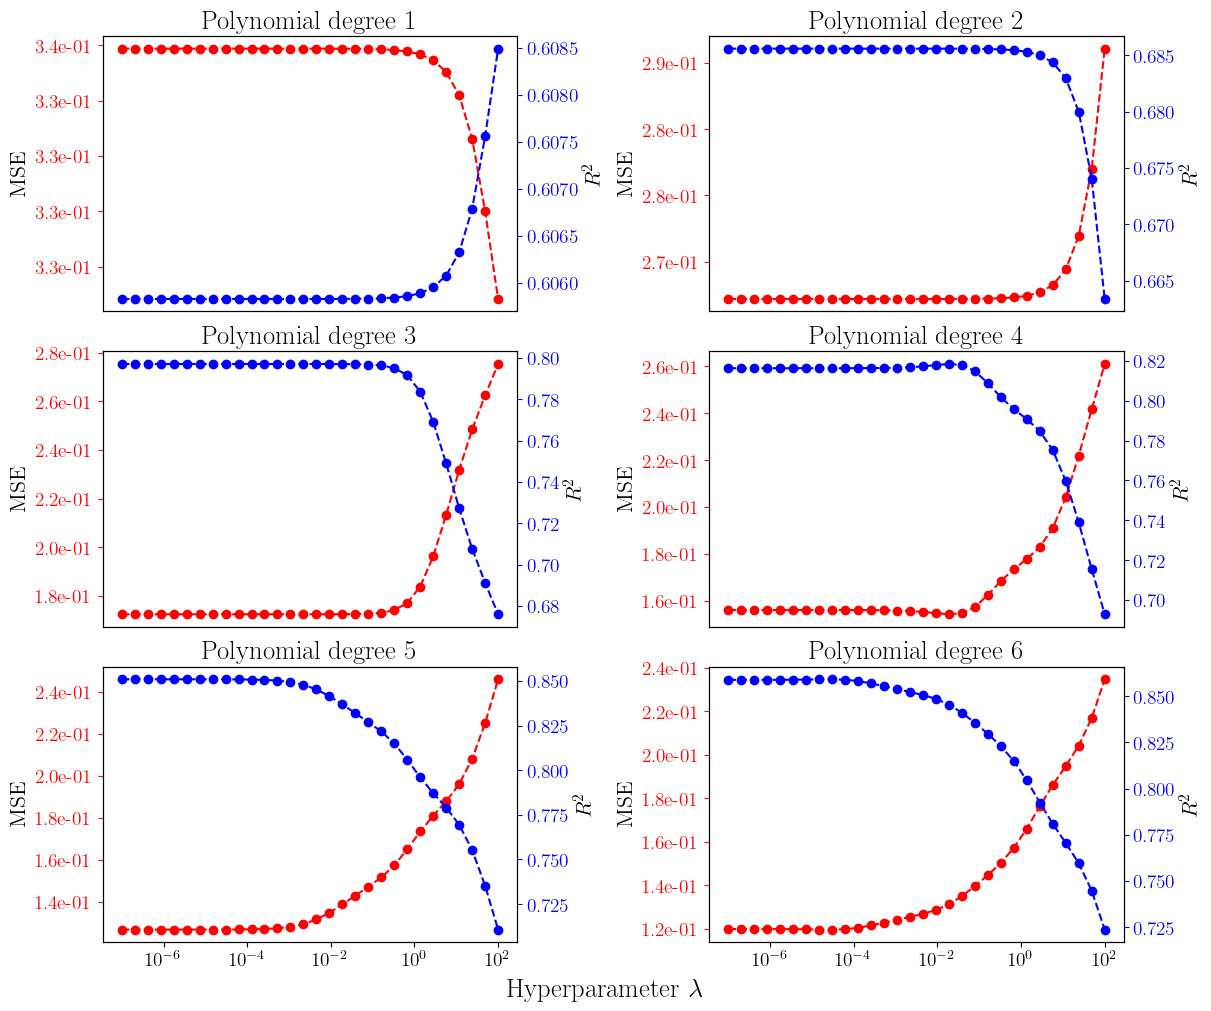

In [619]:
N = 50
x = np.arange(0, 1, 1/N)
y = np.arange(0, 1, 1/N)
xx, yy = np.meshgrid(x, y)
x.reshape(-1, 1); y.reshape(-1, 1) 
z = (FrankeFunction(xx, yy) + np.random.normal(0, 0.1, (N, N))).reshape(-1, 1) 

lambdas = np.logspace(-7, 2, 30)
degrees = range(1, 7)

MSE_ridge_scaled = np.zeros([len(degrees), len(lambdas)])
R2_ridge_scaled = np.zeros([len(degrees), len(lambdas)])
β_ridge_scaled_list = np.zeros([len(degrees), len(lambdas)])

fig, axs = plt.subplots(3, 2, figsize = (12, 10), constrained_layout = True)
idx = [[0, 0], [0, 1], [1, 0], [1, 1], [2, 0], [2, 1]]

for i in range(len(degrees)):
    X = create_X(x, y, n=degrees[i])
    X_train, X_test, y_train, y_test = train_test_split(X, z, test_size=0.2, random_state=seed)
    
    # Scaling the data
    scaler_X = StandardScaler().fit(X_train)
    X_train_scaled = scaler_X.transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)

    scaler_y = StandardScaler().fit(y_train)
    y_train_scaled = scaler_y.transform(y_train)
    y_test_scaled = scaler_y.transform(y_test)

    for j in range(len(lambdas)):
        β_scaled = np.linalg.pinv(X_train_scaled.T @ X_train_scaled + lambdas[j]*np.eye(X_train.shape[1])) @ X_train_scaled.T @ y_train_scaled
        # β_ridge_scaled_list[i,j] = β_scaled
        β_scaled[0] = 0
        y_tilde_scaled = X_train_scaled @ β_scaled 
        y_pred_scaled = X_test_scaled @ β_scaled
        
        MSE_ridge_scaled[i,j] = MSE(y_test_scaled, y_pred_scaled)
        R2_ridge_scaled[i,j] = R2(y_test_scaled, y_pred_scaled)

    ax_1 = axs[idx[i][0], idx[i][1]]
    ax_2 = ax_1.twinx()
    ax_1.plot(lambdas, MSE_ridge_scaled[i],  'r--o')
    ax_2.plot(lambdas, R2_ridge_scaled[i],  'b--o')

    ax_1.set_xscale("log")
    ax_1.set_xscale("log")

    ax_1.set_title(f'Polynomial degree {degrees[i]}')
    ax_1.yaxis.set_major_formatter(FormatStrFormatter("%.2e"))
    ax_1.yaxis.set_major_formatter(FormatStrFormatter("%.1e%%"))

    ax_1.set_ylabel('MSE')
    ax_2.set_ylabel(r'$R^2$')

    ax_1.tick_params("y", colors = "r")
    ax_2.tick_params("y", colors = "b")

    if i < len(degrees) - 2:
        ax_1.set_xticks([])
        ax_1.set_xticks([])

fig.supxlabel(r'Hyperparameter $\lambda$')
plt.savefig("../figs/b_MSE_R2.pdf")
plt.show()

In [620]:
N = 50
x = np.arange(0, 1, 1/N)
y = np.arange(0, 1, 1/N)
xx, yy = np.meshgrid(x, y)
x.reshape(-1, 1); y.reshape(-1, 1)
z = (FrankeFunction(xx, yy) + np.random.normal(0, 0.1, (N, N))).reshape(-1, 1) 

lambdas = np.logspace(-7, 0, 30)
degrees = range(1, 11)

MSE_ridge_scaled = np.zeros([len(degrees), len(lambdas)])
R2_ridge_scaled = np.zeros([len(degrees), len(lambdas)])
β_ridge_scaled_list = np.zeros([len(degrees), len(lambdas)])

for i in range(len(degrees)):
    X = create_X(x, y, n=degrees[i])
    X_train, X_test, y_train, y_test = train_test_split(X, z, test_size=0.2, random_state=seed)
    
    # Scaling the data
    scaler_X = StandardScaler().fit(X_train)
    X_train_scaled = scaler_X.transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)

    scaler_y = StandardScaler().fit(y_train)
    y_train_scaled = scaler_y.transform(y_train)
    y_test_scaled = scaler_y.transform(y_test)

    for j in range(len(lambdas)):
        β_scaled = np.linalg.pinv(X_train_scaled.T @ X_train_scaled + lambdas[j]*np.eye(X_train.shape[1])) @ X_train_scaled.T @ y_train_scaled
        # β_ridge_scaled_list[i,j] = β_scaled
        β_scaled[0] = 0
        y_tilde_scaled = X_train_scaled @ β_scaled 
        y_pred_scaled = X_test_scaled @ β_scaled
        
        MSE_ridge_scaled[i,j] = MSE(y_test_scaled, y_pred_scaled)
        R2_ridge_scaled[i,j] = R2(y_test_scaled, y_pred_scaled)

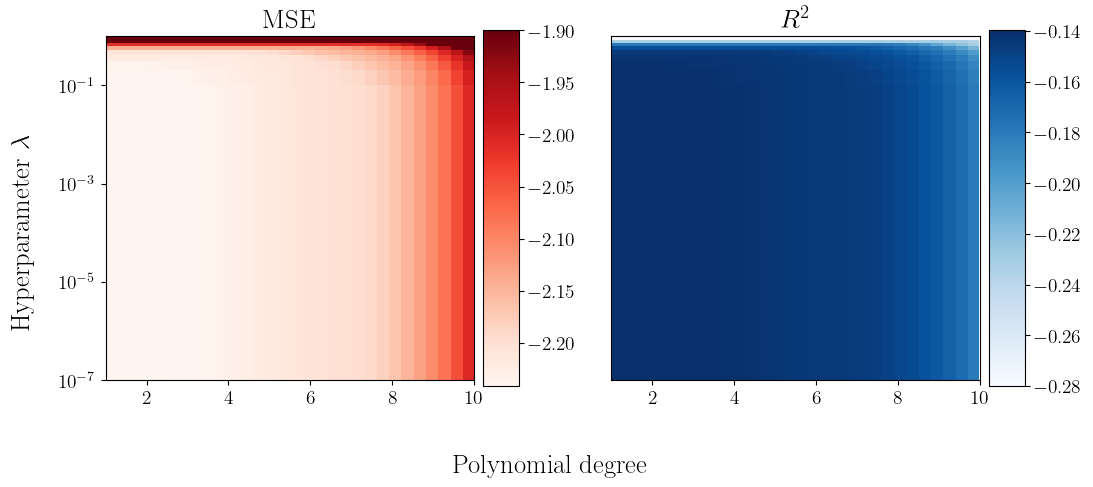

In [621]:
fig, axs = plt.subplots(1, 2, figsize = (11.25, 5))
im_MSE = axs[0].imshow(np.log(MSE_ridge_scaled), cmap = "Reds", interpolation = "nearest", aspect = 1.2, vmax = -1.9, extent = [np.min(degrees), np.max(degrees), np.min(lambdas), np.max(lambdas)])
im_R2 = axs[1].imshow(np.log(R2_ridge_scaled), cmap = "Blues", interpolation = "nearest", aspect = 1.2, vmin = -0.28, extent = [np.min(degrees), np.max(degrees), np.min(lambdas), np.max(lambdas)])
axs[0].set_title("MSE")
axs[1].set_title(r"$R^2$")
plt.colorbar(im_MSE, ax = axs[0], pad = 0.02, shrink = 0.88, aspect = 10)
plt.colorbar(im_R2, ax = axs[1], pad = 0.02, shrink = 0.88, aspect = 10)
axs[0].set_yscale("log")
axs[1].set_yscale("log")
axs[1].set_yticks([])
fig.supxlabel("Polynomial degree")
fig.supylabel(r"Hyperparameter $\lambda$")
plt.tight_layout()
plt.savefig("../figs/b_MSE_R2_imshow.pdf")
plt.show()

In [ ]:
#TODO update conclusions
#TODO mention that colorbars are cut off, and state the real largest values

In [573]:
N = 100
x = np.arange(0, 1, 1/N).reshape(-1, 1)
y = np.arange(0, 1, 1/N).reshape(-1, 1)
# xx, yy = np.meshgrid(x, y)
# z = (FrankeFunction(xx, yy)).reshape(-1, 1) 

# x = x.reshape(-1, 1)
# y = y.reshape(-1, 1)
z = (FrankeFunction(x, y) + np.random.normal(0, 0.1, (N, N))).reshape(-1, 1) 

lambdas = np.logspace(-7, 2, 30)
degrees = range(22, 24)

MSE_ridge_scaled = np.zeros([len(degrees), len(lambdas)])
R2_ridge_scaled = np.zeros([len(degrees), len(lambdas)])
β_ridge_scaled_list = np.zeros([len(degrees), len(lambdas)])

for i in range(len(degrees)):
    X = create_X(x, y, n=degrees[i])
    X_train, X_test, y_train, y_test = train_test_split(X, z, test_size=0.01, random_state=seed)
    
    # Scaling the data
    scaler_X = StandardScaler().fit(X_train)
    X_train_scaled = scaler_X.transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)

    scaler_y = StandardScaler().fit(y_train)
    y_train_scaled = scaler_y.transform(y_train)
    y_test_scaled = scaler_y.transform(y_test)

    for j in range(len(lambdas)):
        # β_scaled = np.linalg.pinv(X_train_scaled.T @ X_train_scaled + lambdas[j]*np.eye(X_train.shape[1])) @ X_train_scaled.T @ y_train_scaled
        β_scaled = np.linalg.pinv(X_train_scaled.T @ X_train_scaled) @ X_train_scaled.T @ y_train_scaled
        # β_ridge_scaled_list[i,j] = β_scaled
        β_scaled[0] = 0
        y_tilde_scaled = X_train_scaled @ β_scaled 
        y_pred_scaled = X_test_scaled @ β_scaled
        
        MSE_ridge_scaled[i,j] = MSE(y_test_scaled, y_pred_scaled)
        R2_ridge_scaled[i,j] = R2(y_test_scaled, y_pred_scaled)

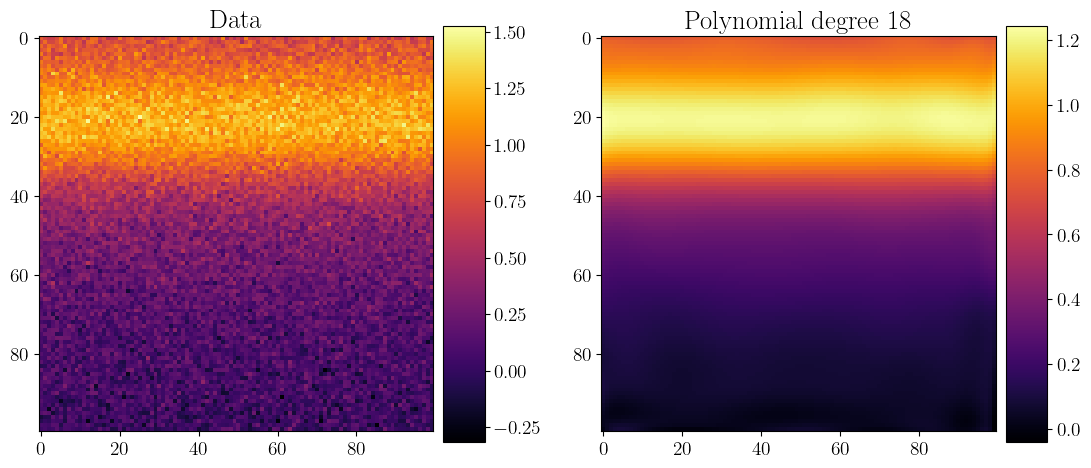

In [574]:
fig, axs = plt.subplots(1, 2, figsize = (11.25, 5))
im = axs[0].imshow(z.reshape(((N, N))), cmap = "inferno", interpolation = "nearest")
im_fit = axs[1].imshow(scaler_y.inverse_transform(scaler_X.transform(X) @ β_scaled).reshape(((N, N))), cmap = "inferno", interpolation = "nearest")
axs[0].set_title(r"Data")
axs[1].set_title(r"Polynomial degree 18")
plt.colorbar(im, ax = axs[0], pad = 0.02, shrink = 0.92, aspect = 10)
plt.colorbar(im_fit, ax = axs[1], pad = 0.02, shrink = 0.92, aspect = 10)
plt.tight_layout()
# plt.savefig("../figs/density_old_w_18.pdf")
plt.show()

In [ ]:
#TODO double check X matrix

### Conclusions
- Increasing the polynomial degree increases the error. For discussion, the difference is almost negligible to the point of chalking it up to rounding errors.
- Increasing the lambda, decreases the error. It is noted for the first and second order polynomial this does not stand
- There is no obvious trend to observe in the different lambdas. Our inital theory comes from rounding error here as well

### Open questions
- Increase amount and range of lambda

## c)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.966e+02, tolerance: 2.000e-01
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.965e+02, tolerance: 2.000e-01
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

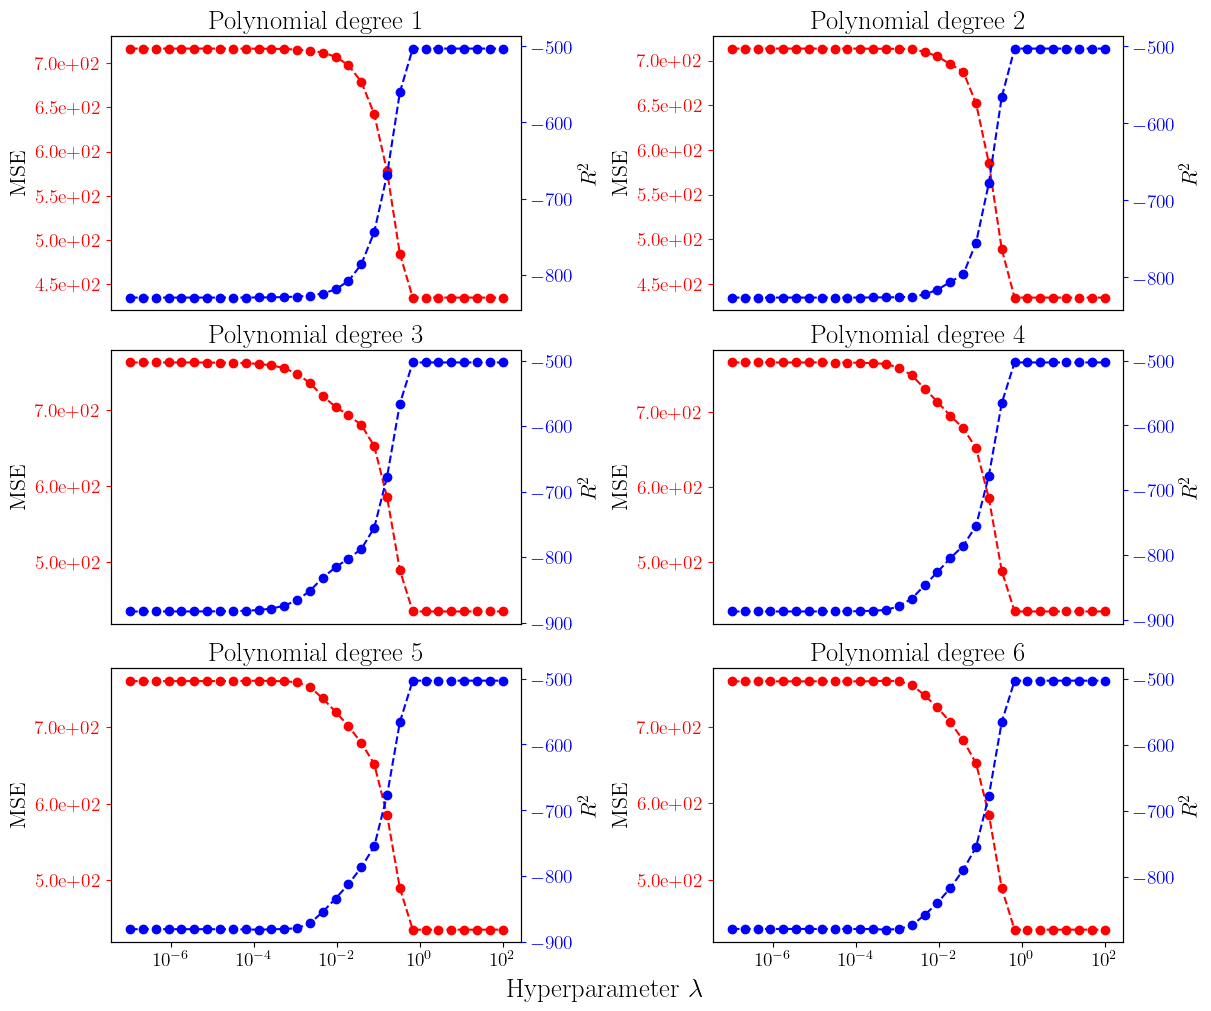

In [622]:
N = 50
x = np.arange(0, 1, 1/N)
y = np.arange(0, 1, 1/N)
xx, yy = np.meshgrid(x, y)
x.reshape(-1, 1); y.reshape(-1, 1)
z = (FrankeFunction(xx, yy) + np.random.normal(0, 0.1, (N, N))).reshape(-1, 1) 

lambdas = np.logspace(-7, 2, 30)
degrees = range(1, 7)

MSE_lasso_scaled = np.zeros([len(degrees), len(lambdas)])
R2_lasso_scaled = np.zeros([len(degrees), len(lambdas)])
β_lasso_scaled_list = np.zeros([len(degrees), len(lambdas)])

fig, axs = plt.subplots(3, 2, figsize = (12, 10), constrained_layout = True)
idx = [[0, 0], [0, 1], [1, 0], [1, 1], [2, 0], [2, 1]]

for i in range(len(degrees)):
    X = create_X(x, y, n=degrees[i])
    X_train, X_test, y_train, y_test = train_test_split(X, z, test_size=0.2, random_state=seed)
    
    # Scaling the data
    scaler_X = StandardScaler().fit(X_train)
    X_train_scaled = scaler_X.transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)

    scaler_y = StandardScaler().fit(y_train)
    y_train_scaled = scaler_y.transform(y_train)
    y_test_scaled = scaler_y.transform(y_test)

    for j in range(len(lambdas)):
        RegLasso = linear_model.Lasso(lambdas[j], fit_intercept = False)
        RegLasso.fit(X_train_scaled, y_train_scaled)
        y_tilde_lasso = RegLasso.predict(X_train_scaled)
        y_pred_lasso = RegLasso.predict(X_test_scaled)

        MSE_lasso_scaled[i,j] = MSE(y_test_scaled, y_pred_lasso)
        R2_lasso_scaled[i,j] = R2(y_test_scaled, y_pred_lasso)

    ax_1 = axs[idx[i][0], idx[i][1]]
    ax_2 = ax_1.twinx()
    ax_1.plot(lambdas, MSE_lasso_scaled[i],  'r--o')
    ax_2.plot(lambdas, R2_lasso_scaled[i],  'b--o')

    ax_1.set_xscale("log")
    ax_1.set_xscale("log")

    ax_1.set_title(f'Polynomial degree {degrees[i]}')
    ax_1.yaxis.set_major_formatter(FormatStrFormatter("%.2e"))
    ax_1.yaxis.set_major_formatter(FormatStrFormatter("%.1e%%"))

    ax_1.set_ylabel('MSE')
    ax_2.set_ylabel(r'$R^2$')

    ax_1.tick_params("y", colors = "r")
    ax_2.tick_params("y", colors = "b")

    if i < len(degrees) - 2:
        ax_1.set_xticks([])
        ax_1.set_xticks([])

fig.supxlabel(r'Hyperparameter $\lambda$')
plt.savefig("../figs/c_MSE_R2.pdf")
plt.show()

In [623]:
N = 50
x = np.arange(0, 1, 1/N)
y = np.arange(0, 1, 1/N)
xx, yy = np.meshgrid(x, y)
x.reshape(-1, 1); y.reshape(-1, 1) 
z = (FrankeFunction(xx, yy) + np.random.normal(0, 0.1, (N, N))).reshape(-1, 1) 

lambdas = np.logspace(-7, 0, 30)
degrees = range(1, 11)

MSE_lasso_scaled = np.zeros([len(degrees), len(lambdas)])
R2_lasso_scaled = np.zeros([len(degrees), len(lambdas)])
β_lasso_scaled_list = np.zeros([len(degrees), len(lambdas)])

for i in range(len(degrees)):
    X = create_X(x, y, n=degrees[i])
    X_train, X_test, y_train, y_test = train_test_split(X, z, test_size=0.2, random_state=seed)
    
    # Scaling the data
    scaler_X = StandardScaler().fit(X_train)
    X_train_scaled = scaler_X.transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)

    scaler_y = StandardScaler().fit(y_train)
    y_train_scaled = scaler_y.transform(y_train)
    y_test_scaled = scaler_y.transform(y_test)

    for j in range(len(lambdas)):
        RegLasso = linear_model.Lasso(lambdas[j], fit_intercept = False)
        RegLasso.fit(X_train_scaled, y_train_scaled)
        y_tilde_lasso = RegLasso.predict(X_train_scaled)
        y_pred_lasso = RegLasso.predict(X_test_scaled)

        MSE_lasso_scaled[i,j] = MSE(y_test_scaled, y_pred_lasso)
        R2_lasso_scaled[i,j] = R2(y_test_scaled, y_pred_lasso)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.894e+02, tolerance: 2.000e-01
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.893e+02, tolerance: 2.000e-01
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

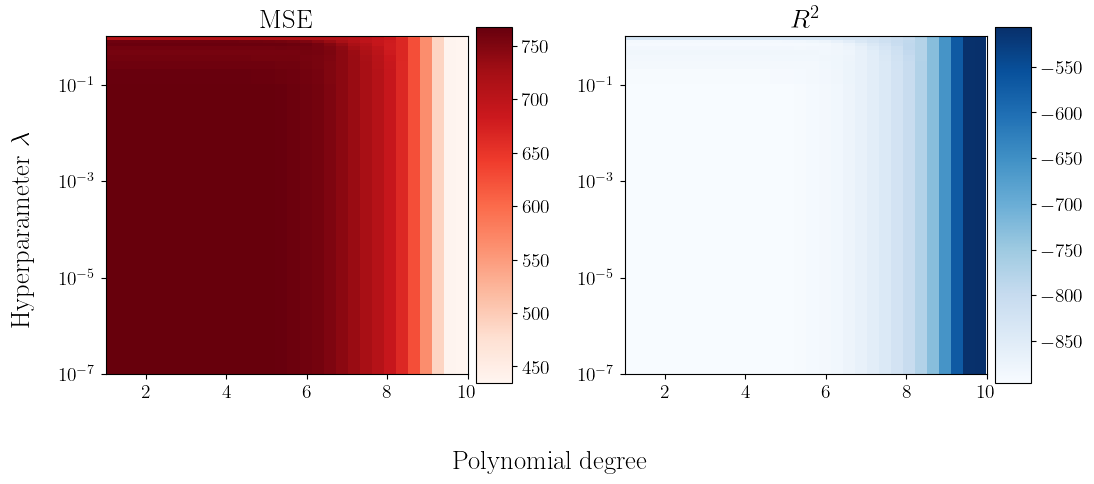

In [624]:
fig, axs = plt.subplots(1, 2, figsize = (11.25, 5))
im_MSE = axs[0].imshow(MSE_lasso_scaled, cmap = "Reds", interpolation = "nearest", aspect = 1.2, extent = [np.min(degrees), np.max(degrees), np.min(lambdas), np.max(lambdas)])
im_R2 = axs[1].imshow(R2_lasso_scaled, cmap = "Blues", interpolation = "nearest", aspect = 1.2, extent = [np.min(degrees), np.max(degrees), np.min(lambdas), np.max(lambdas)])
axs[0].set_title("MSE")
axs[1].set_title(r"$R^2$")
plt.colorbar(im_MSE, ax = axs[0], pad = 0.02, shrink = 0.88, aspect = 10)
plt.colorbar(im_R2, ax = axs[1], pad = 0.02, shrink = 0.88, aspect = 10)
axs[0].set_yscale("log")
axs[1].set_yscale("log")
fig.supxlabel("Polynomial degree")
fig.supylabel(r"Hyperparameter $\lambda$")
plt.tight_layout()
plt.savefig("../figs/c_MSE_R2_imshow.pdf")
plt.show()

In [ ]:
#TODO what is wrong here? why so large mse and negative R

## e)

### Plotting MSE on training and test set as functions of polynomial degrees between $[1,50]$

In [627]:
N = 50
x = np.arange(0, 1, 1/N)
y = np.arange(0, 1, 1/N)
xx, yy = np.meshgrid(x, y)
x.reshape(-1, 1); y.reshape(-1, 1) 
z = (FrankeFunction(xx, yy) + np.random.normal(0, 0.1, (N, N))).reshape(-1, 1) 

MSE_test_scaled = []
MSE_train_scaled = []

degrees = range(1, 51)
for degree in degrees:
    X = create_X(x, y, n=degree)
    X_train, X_test, y_train, y_test = train_test_split(X, z, test_size=0.2, random_state=seed)
    
    # Scaled
    scaler_X = StandardScaler().fit(X_train)
    X_train_scaled = scaler_X.transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)

    scaler_y = StandardScaler().fit(y_train)
    y_train_scaled = scaler_y.transform(y_train)
    y_test_scaled = scaler_y.transform(y_test)

    β_scaled = np.linalg.pinv(X_train_scaled.T @ X_train_scaled) @ X_train_scaled.T @ y_train_scaled
    β_scaled[0] = 0
    y_tilde_scaled = X_train_scaled @ β_scaled 
    y_pred_scaled = X_test_scaled @ β_scaled
    
    MSE_train_scaled.append(MSE(y_train_scaled, y_tilde_scaled))
    MSE_test_scaled.append(MSE(y_test_scaled, y_pred_scaled))

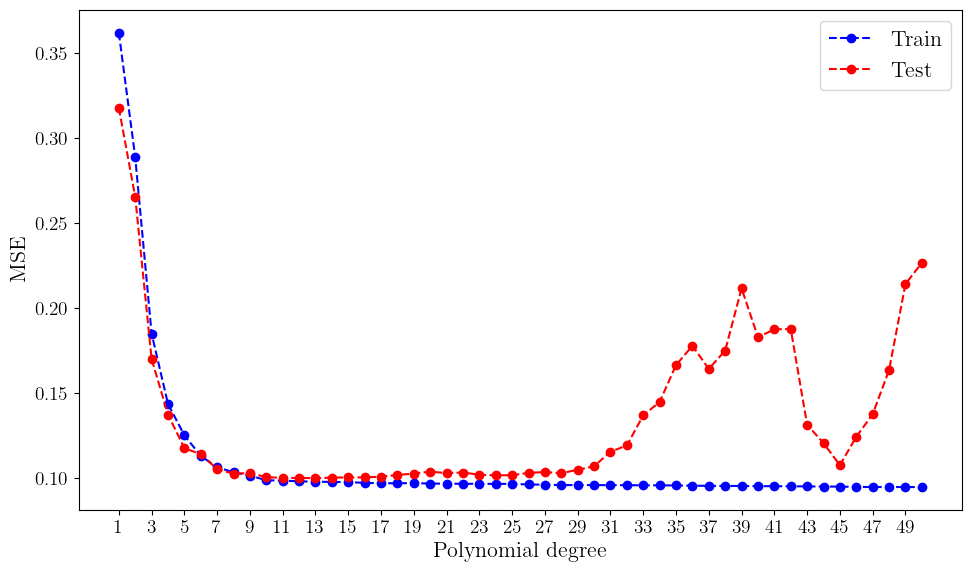

In [628]:
fig = plt.figure(figsize = (10, 6))

# Plotting in grid
plt.plot(degrees, MSE_train_scaled, "b--o", label = "Train")
plt.plot(degrees, MSE_test_scaled, "r--o", label = "Test")
plt.legend()

## Axis labels
plt.xlabel('Polynomial degree')
plt.ylabel('MSE')
plt.xticks(degrees[::2])

plt.tight_layout()
plt.savefig("../figs/e_MSE_train_test.pdf")
plt.show()

In [ ]:
#TODO how recreate fig 2.11?
#TODO remove raw

### Plotting MSE, bias and variance as functions of polynomial degrees between $[1,50]$

In [635]:
N = 50
x = np.arange(0, 1, 1/N)
y = np.arange(0, 1, 1/N)
xx, yy = np.meshgrid(x, y)
x.reshape(-1, 1); y.reshape(-1, 1) 
z = (FrankeFunction(xx, yy) + np.random.normal(0, 0.1, (N, N))).reshape(-1, 1) 

n_bootstraps = 100
degrees = range(1, 52, 2)

error = np.zeros(len(degrees)); bias = np.zeros(len(degrees)); variance = np.zeros(len(degrees))
for i in range(len(degrees)):
    X = create_X(x, y, n = degrees[i])
    X_train, X_test, y_train, y_test = train_test_split(X, z, test_size = 0.2, random_state = seed)

    #TODO correct to only use scaled?
    scaler_X = StandardScaler().fit(X_train)
    X_train = scaler_X.transform(X_train)
    X_test = scaler_X.transform(X_test)

    scaler_y = StandardScaler().fit(y_train)
    y_train = scaler_y.transform(y_train)
    y_test = scaler_y.transform(y_test)

    # The following (m x n_bootstraps) matrix holds the column vectors y_pred for each bootstrap iteration.
    y_pred = np.empty((y_test.shape[0], n_bootstraps))
    for j in range(n_bootstraps):
        X_, y_ = resample(X_train, y_train)

        β = np.linalg.pinv(X_.T @ X_) @ X_.T @ y_
        β[0] = 0

        # Evaluate the new model on the same test data each time.
        y_pred[:, j] = (X_test @ β).ravel()

    #TODO done correctly?
    error[i] = np.mean(np.mean((y_test - y_pred)**2, axis=1, keepdims=True))  # MSE on test set
    bias[i] = np.mean((y_test - np.mean(y_pred, axis=1, keepdims=True))**2)            # Model bias
    variance[i] = np.mean(np.var(y_pred, axis=1, keepdims=True))                                # Model variance

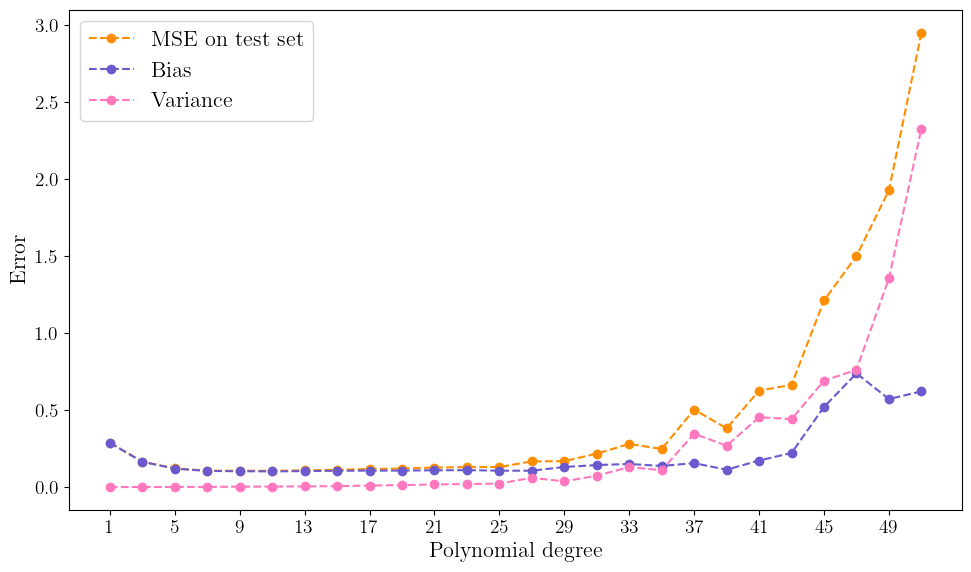

In [636]:
plt.figure(figsize = (10, 6))
plt.plot(degrees, error, label = "MSE on test set", linestyle = "--", marker = "o", color = "#ff8d00")
plt.plot(degrees, bias, label = "Bias", linestyle = "--", marker = "o", color = "slateblue")
plt.plot(degrees, variance, label = "Variance", linestyle = "--", marker = "o", color = "#ff77bc")
plt.legend(loc = 2)
plt.xticks(degrees[::2])
plt.xlabel("Polynomial degree")
plt.ylabel("Error")
plt.tight_layout()
plt.savefig("../figs/e_poly_degrees.pdf")
plt.show()

### Plotting MSE, bias and variance as functions of numbers of data points between $[10, 1000]$ for polynomial degree $5$

In [639]:
N = np.array([10, 20, 30, 40, 50, 100, 150, 200, 300, 400, 500, 1000])
n_bootstraps = 100
degree = 5

error = np.zeros(len(N)); bias = np.zeros(len(N)); variance = np.zeros(len(N))
for i in range(len(N)):
    x = np.arange(0, 1, 1/N[i])
    y = np.arange(0, 1, 1/N[i])
    xx, yy = np.meshgrid(x, y)
    x.reshape(-1, 1); y.reshape(-1, 1) 
    z = (FrankeFunction(xx, yy) + np.random.normal(0, 0.1, (N[i], N[i]))).reshape(-1, 1) 

    X = create_X(x, y, n = degree)
    X_train, X_test, y_train, y_test = train_test_split(X, z, test_size = 0.2, random_state = seed)

    #TODO correct to only use scaled?
    scaler_X = StandardScaler().fit(X_train)
    X_train = scaler_X.transform(X_train)
    X_test = scaler_X.transform(X_test)

    scaler_y = StandardScaler().fit(y_train)
    y_train = scaler_y.transform(y_train)
    y_test = scaler_y.transform(y_test)

    # The following (m x n_bootstraps) matrix holds the column vectors y_pred for each bootstrap iteration.
    y_pred = np.empty((y_test.shape[0], n_bootstraps))
    for j in range(n_bootstraps):
        X_, y_ = resample(X_train, y_train)

        β = np.linalg.pinv(X_.T @ X_) @ X_.T @ y_
        β[0] = 0

        # Evaluate the new model on the same test data each time.
        y_pred[:, j] = (X_test @ β).ravel()

    #TODO done correctly?
    error[i] = np.mean(np.mean((y_test - y_pred)**2, axis=1, keepdims=True))  # MSE on test set
    bias[i] = np.mean((y_test - np.mean(y_pred, axis=1, keepdims=True))**2)            # Model bias
    variance[i] = np.mean(np.var(y_pred, axis=1, keepdims=True))                                # Model variance

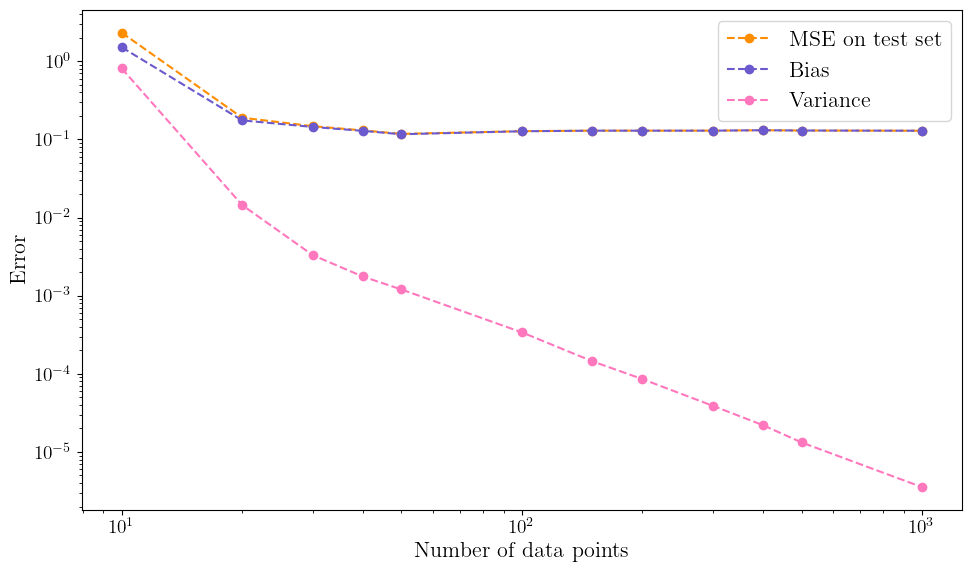

In [640]:
plt.figure(figsize = (10, 6))
plt.plot(N, error, label = "MSE on test set", linestyle = "--", marker = "o", color = "#ff8d00")
plt.plot(N, bias, label = "Bias", linestyle = "--", marker = "o", color = "slateblue")
plt.plot(N, variance, label = "Variance", linestyle = "--", marker = "o", color = "#ff77bc")
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Number of data points")
plt.ylabel("Error")
plt.tight_layout()
plt.savefig("../figs/e_N_points.pdf")
plt.show()

### Plotting MSE, bias and variance as functions of number of bootstrap steps between $[1, 1000]$ for polynomial degree $5$ and $50$ data points

In [641]:
N = 50
n_bootstraps = np.array([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000])
degree = 5

x = np.arange(0, 1, 1/N)
y = np.arange(0, 1, 1/N)
xx, yy = np.meshgrid(x, y)
x.reshape(-1, 1); y.reshape(-1, 1) 
z = (FrankeFunction(xx, yy) + np.random.normal(0, 0.1, (N, N))).reshape(-1, 1) 

X = create_X(x, y, n = degree)
X_train, X_test, y_train, y_test = train_test_split(X, z, test_size = 0.2, random_state = seed)

#TODO correct to only use scaled?
scaler_X = StandardScaler().fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

scaler_y = StandardScaler().fit(y_train)
y_train = scaler_y.transform(y_train)
y_test = scaler_y.transform(y_test)

error = np.zeros(len(n_bootstraps)); bias = np.zeros(len(n_bootstraps)); variance = np.zeros(len(n_bootstraps))
for i in range(len(n_bootstraps)):
    # The following (m x n_bootstraps) matrix holds the column vectors y_pred for each bootstrap iteration.
    y_pred = np.empty((y_test.shape[0], n_bootstraps[i]))
    for j in range(n_bootstraps[i]):
        X_, y_ = resample(X_train, y_train)

        β = np.linalg.pinv(X_.T @ X_) @ X_.T @ y_
        β[0] = 0

        # Evaluate the new model on the same test data each time.
        y_pred[:, j] = (X_test @ β).ravel()

    #TODO done correctly?
    error[i] = np.mean(np.mean((y_test - y_pred)**2, axis=1, keepdims=True))  # MSE on test set
    bias[i] = np.mean((y_test - np.mean(y_pred, axis=1, keepdims=True))**2)            # Model bias
    variance[i] = np.mean(np.var(y_pred, axis=1, keepdims=True))                                # Model variance

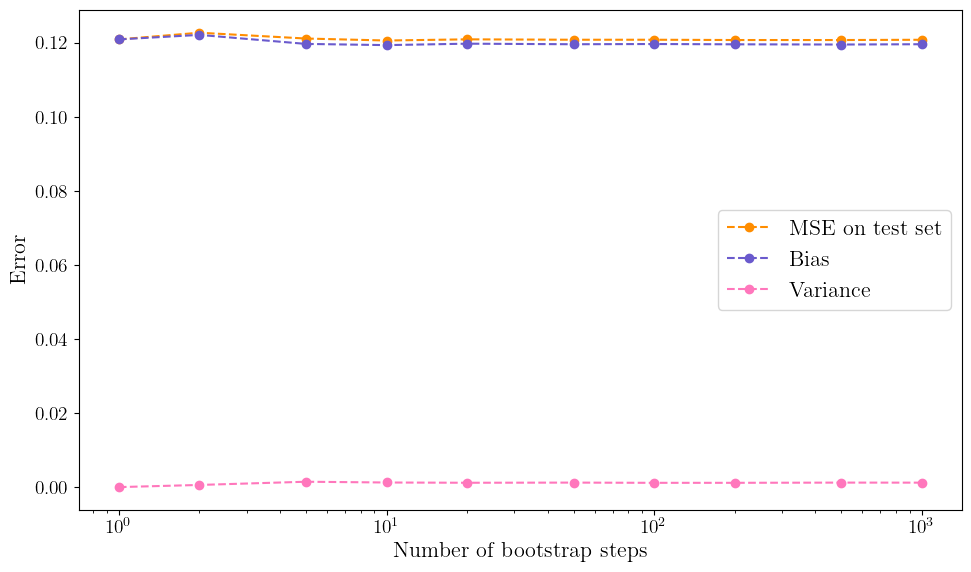

In [642]:
plt.figure(figsize = (10, 6))
plt.plot(n_bootstraps, error, label = "MSE on test set", linestyle = "--", marker = "o", color = "#ff8d00")
plt.plot(n_bootstraps, bias, label = "Bias", linestyle = "--", marker = "o", color = "slateblue")
plt.plot(n_bootstraps, variance, label = "Variance", linestyle = "--", marker = "o", color = "#ff77bc")
plt.legend()
plt.xscale("log")
# plt.yscale("log")
plt.xlabel("Number of bootstrap steps")
plt.ylabel("Error")
plt.tight_layout()
plt.savefig("../figs/e_n_bootstraps.pdf")
plt.show()

### Plotting MSE, bias and variance as functions of test size between $[0.05, 0.95]$ for polynomial degree $5$ and $50$ data points

In [643]:
N = 50
n_bootstraps = 100
degree = 5

x = np.arange(0, 1, 1/N)
y = np.arange(0, 1, 1/N)
xx, yy = np.meshgrid(x, y)
x.reshape(-1, 1); y.reshape(-1, 1) 
z = (FrankeFunction(xx, yy) + np.random.normal(0, 0.1, (N, N))).reshape(-1, 1) 

test_sizes = np.arange(0.05, 0.96, 0.05)

error = np.zeros(len(test_sizes)); bias = np.zeros(len(test_sizes)); variance = np.zeros(len(test_sizes))
for i in range(len(test_sizes)):
    X = create_X(x, y, n = degree)
    X_train, X_test, y_train, y_test = train_test_split(X, z, test_size = test_sizes[i], random_state = seed)

    #TODO correct to only use scaled?
    scaler_X = StandardScaler().fit(X_train)
    X_train = scaler_X.transform(X_train)
    X_test = scaler_X.transform(X_test)

    scaler_y = StandardScaler().fit(y_train)
    y_train = scaler_y.transform(y_train)
    y_test = scaler_y.transform(y_test)

    # The following (m x n_bootstraps) matrix holds the column vectors y_pred for each bootstrap iteration.
    y_pred = np.empty((y_test.shape[0], n_bootstraps))
    for j in range(n_bootstraps):
        X_, y_ = resample(X_train, y_train)

        β = np.linalg.pinv(X_.T @ X_) @ X_.T @ y_
        β[0] = 0

        # Evaluate the new model on the same test data each time.
        y_pred[:, j] = (X_test @ β).ravel()

    #TODO done correctly?
    error[i] = np.mean(np.mean((y_test - y_pred)**2, axis=1, keepdims=True))  # MSE on test set
    bias[i] = np.mean((y_test - np.mean(y_pred, axis=1, keepdims=True))**2)   # Model bias
    variance[i] = np.mean(np.var(y_pred, axis=1, keepdims=True))              # Model variance

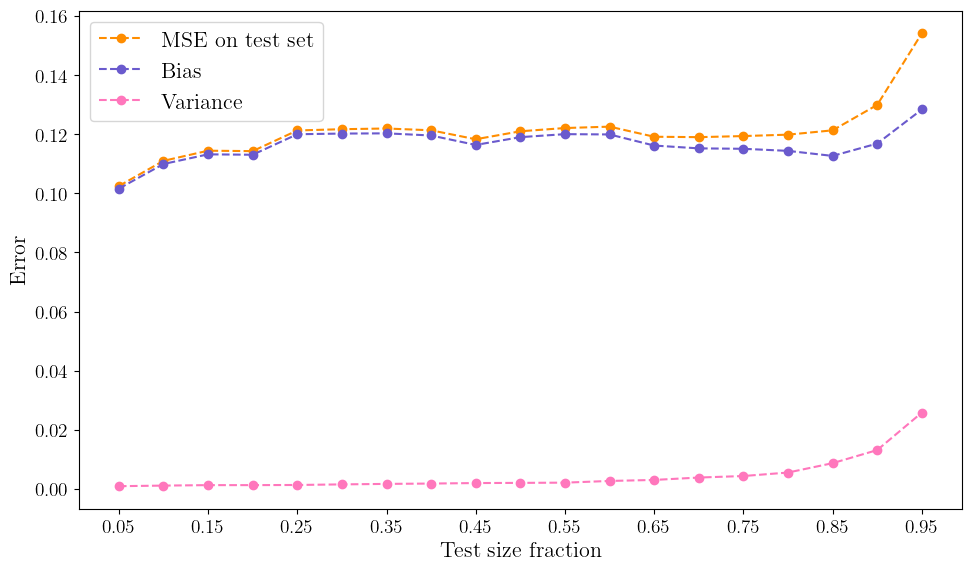

In [644]:
plt.figure(figsize = (10, 6))
plt.plot(test_sizes, error, label = "MSE on test set", linestyle = "--", marker = "o", color = "#ff8d00")
plt.plot(test_sizes, bias, label = "Bias", linestyle = "--", marker = "o", color = "slateblue")
plt.plot(test_sizes, variance, label = "Variance", linestyle = "--", marker = "o", color = "#ff77bc")
plt.legend()
# plt.xscale("log")
# plt.yscale("log")
plt.xlabel("Test size fraction")
plt.ylabel("Error")
plt.xticks(test_sizes[::2])
plt.tight_layout()
plt.savefig("../figs/e_test_sizes.pdf")
plt.show()

In [ ]:
#TODO done correctly? fix so that it doesnt take so long
#TODO plot as function of number of bootstrap steps?
#TODO plot as function of test fraction?
#TODO combine four last plots into one, using subplots
#TODO maybe make imshow plot with N and poly degree?

## f)

In [645]:
from sklearn.model_selection import KFold, cross_val_score

def kfold_crossval(x, y, z, k, model, degree):
    """
    Performs k-fold cross-validation.
    """
    kfold = KFold(n_splits=k)

    X = create_X(x, y, degree)
    scaler_X = StandardScaler().fit(X)
    scaler_z = StandardScaler().fit(z)
    estimated_mse_folds = cross_val_score(model, scaler_X.transform(X), scaler_z.transform(z), scoring='neg_mean_squared_error', cv=kfold)
    estimated_mse = np.mean(-estimated_mse_folds)

    return estimated_mse

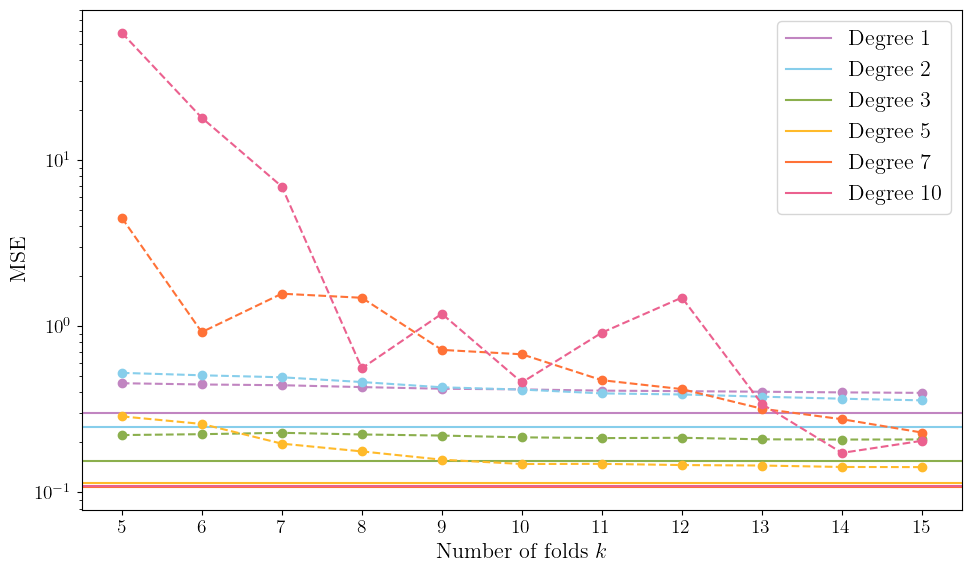

In [646]:
N = 50
x = np.arange(0, 1, 1/N)
y = np.arange(0, 1, 1/N)
xx, yy = np.meshgrid(x, y)
x.reshape(-1, 1); y.reshape(-1, 1) 
z = (FrankeFunction(xx, yy) + np.random.normal(0, 0.1, (N, N))).reshape(-1, 1) 

OLS = LinearRegression(fit_intercept = False)

n_bootstraps = 100
degrees = [1, 2, 3, 5, 7, 10]
k = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
colors = ["#c185c1", "#87ceeb", "#8baf4d", "#ffba2a", "#ff7237", "#eb618f"]

fig = plt.figure(figsize = (10, 6))
for i in range(len(degrees)):
    MSE_kfold = np.zeros(len(k))
    for j in range(len(k)):
        MSE_kfold[j] = kfold_crossval(x, y, z, k[j], OLS, degrees[i])

    X = create_X(x, y, n = degrees[i])
    X_train, X_test, y_train, y_test = train_test_split(X, z, test_size = 0.2, random_state = seed)

    scaler_X = StandardScaler().fit(X_train)
    X_train = scaler_X.transform(X_train)
    X_test = scaler_X.transform(X_test)

    scaler_y = StandardScaler().fit(y_train)
    y_train = scaler_y.transform(y_train)
    y_test = scaler_y.transform(y_test)

    # The following (m x n_bootstraps) matrix holds the column vectors y_pred for each bootstrap iteration.
    y_pred = np.empty((y_test.shape[0], n_bootstraps))
    for j in range(n_bootstraps):
        X_, y_ = resample(X_train, y_train)

        # β = np.linalg.pinv(X_.T @ X_) @ X_.T @ y_

        # Evaluate the new model on the same test data each time.
        y_pred[:, j] = OLS.fit(X_, y_).predict(X_test).ravel()

    #TODO done correctly?
    MSE_bootstrap = np.mean(np.mean((y_test - y_pred)**2, axis=1, keepdims=True))  # MSE on test set

    plt.plot(k, MSE_kfold, linestyle = "--", marker = "o", color = colors[i], zorder = 1)
    plt.axhline(MSE_bootstrap, xmin = 0, xmax = 1, label = f"Degree {degrees[i]}", color = colors[i], zorder = 0)

plt.legend()
plt.xlabel(r"Number of folds $k$")
plt.ylabel("MSE")
plt.xticks(k)
plt.yscale("log")
plt.tight_layout()
plt.savefig("../figs/f_kfold_vs_bootstrap.pdf")
plt.show()

In [ ]:
#TODO make intensity plot instead, and maybe more data points? 

In [647]:
N = 50
x = np.arange(0, 1, 1/N)
y = np.arange(0, 1, 1/N)
xx, yy = np.meshgrid(x, y)
x.reshape(-1, 1); y.reshape(-1, 1) 
z = (FrankeFunction(xx, yy) + np.random.normal(0, 0.1, (N, N))).reshape(-1, 1) 

OLS = LinearRegression(fit_intercept = False)

degrees = [1, 2, 3, 5, 7, 10]
lambdas = [0.01, 0.1]
k = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

MSE_OLS, MSE_Ridge, MSE_Lasso = np.zeros((len(degrees), len(k))), np.zeros((len(degrees), len(k), len(lambdas))), np.zeros((len(degrees), len(k), len(lambdas)))
for i in range(len(degrees)):
    for j in range(len(k)):
        MSE_OLS[i, j] = kfold_crossval(x, y, z, k[j], OLS, degrees[i])
        for l in range(len(lambdas)):
            MSE_Ridge[i, j, l] = kfold_crossval(x, y, z, k[j], linear_model.Ridge(lambdas[l], fit_intercept = False), degrees[i])
            MSE_Lasso[i, j, l] = kfold_crossval(x, y, z, k[j], linear_model.Lasso(lambdas[l], fit_intercept = False), degrees[i])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.814e-01, tolerance: 2.262e-01
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.290e-01, tolerance: 2.364e-01
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

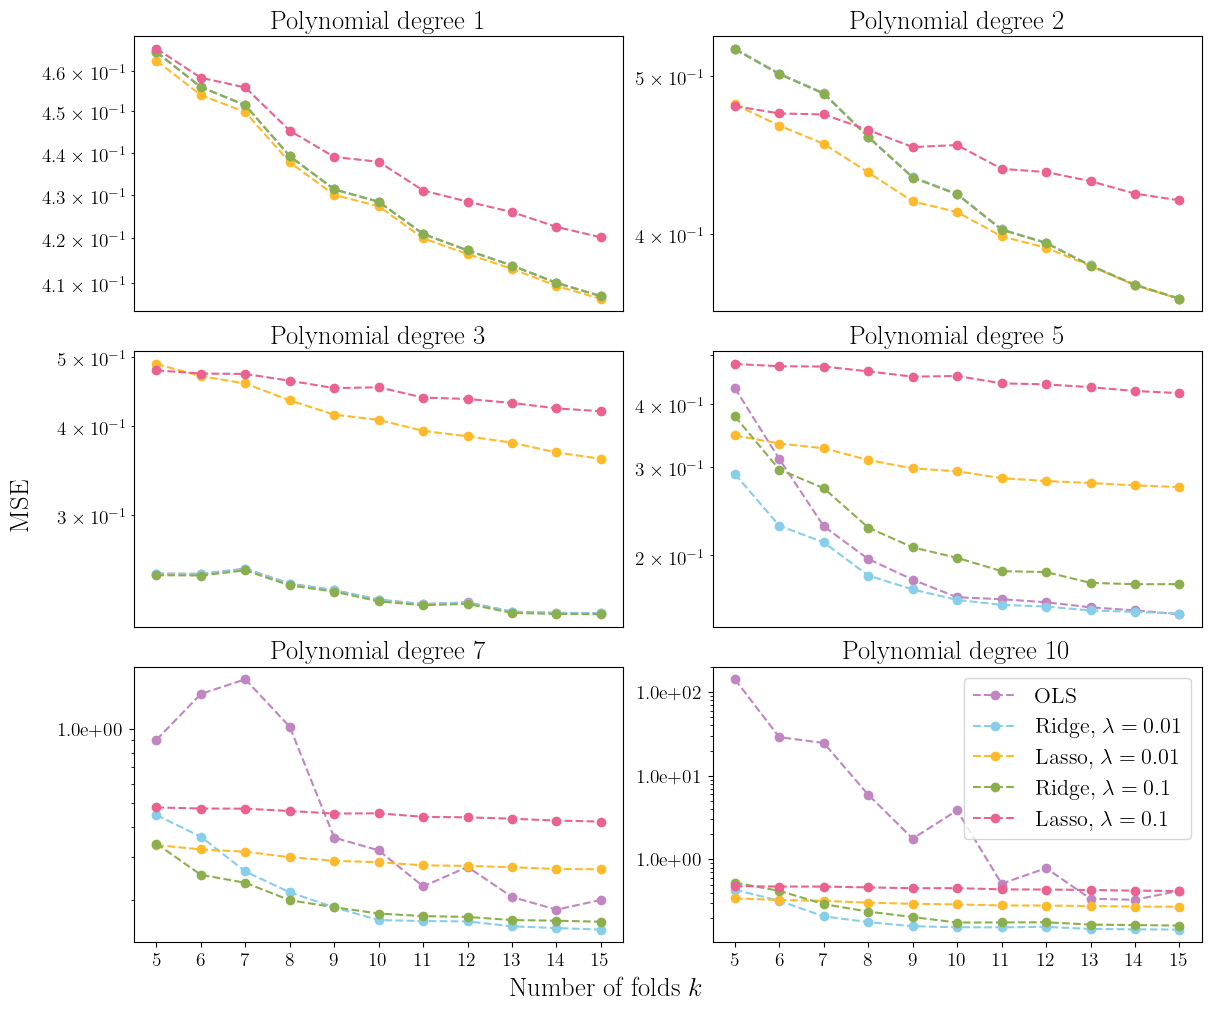

In [648]:
fig, axs = plt.subplots(3, 2, figsize = (12, 10), constrained_layout = True)
idx = [[0, 0], [0, 1], [1, 0], [1, 1], [2, 0], [2, 1]]
colors = ["#c185c1", "#fc721c", "#fc9b1c", "#47b2f5", "#35bd37"] 
colors = ["#c185c1", "#87ceeb", "#8baf4d", "#ffba2a", "#eb618f"]

for i in range(len(degrees)):
    ax = axs[idx[i][0], idx[i][1]]
    ax.plot(k, MSE_OLS[i], '--o', color = colors[0], label = "OLS")
    for l in range(len(lambdas)):
        ax.plot(k, MSE_Ridge[i, :, l], '--o', color = colors[1+l], label = r"Ridge, $\lambda=\:$" + f"{lambdas[l]}")
        ax.plot(k, MSE_Lasso[i, :, l], '--o', color = colors[3+l], label = r"Lasso, $\lambda=\:$" + f"{lambdas[l]}")

    ax.set_yscale("log")

    ax.set_title(f'Polynomial degree {degrees[i]}')
    ax.yaxis.set_major_formatter(FormatStrFormatter("%.2e"))
    ax.yaxis.set_major_formatter(FormatStrFormatter("%.1e%%"))

    if i < len(degrees) - 2:
        ax.set_xticks([])
    else:
        ax.set_xticks(k)

plt.legend()
fig.supylabel("MSE")
fig.supxlabel(r"Number of folds $k$")
plt.savefig("../figs/f_OLS_Ridge_Lasso.pdf")
plt.show()

## g)

### Dark matter simulation data at redshift $z\approx0$

In [681]:
with open("../data/darkmatter.txt", "r") as infile:
    params = infile.readline().split(",")
    box_unit, rho_unit, h, a = params[0].split(": ")[1], params[1].split(": ")[1], float(params[2].split(": ")[1]), float(params[3].split(": ")[1]) 
    y = np.array(infile.readline().split(), dtype = float)
    x = []; rho = []
    for line in infile:
        vals = line.split()
        x.append(float(vals[-1]))
        rho.append(np.array(vals[:-1], dtype = float))
x = np.array(x); rho = np.array(rho)
xx, yy = np.meshgrid(x, y)

#### Smoothing the data over $20\:\text{px}\times20\:\text{px}$ cubes

In [17]:
rho_sm = np.zeros(rho.shape)
idx_x = np.concatenate((np.zeros(10, dtype = int), range(len(rho)), -np.ones(10, dtype = int)))
idx_y = np.concatenate((np.zeros(10, dtype = int), range(len(rho[0])), -np.ones(10, dtype = int)))
for i in range(len(rho)):
    for j in range(len(rho[0])):
        rho_sm[i, j] = np.mean(rho[idx_x[i]:idx_x[i+20], idx_y[j]:idx_y[j+20]])

### Dark matter simulation data at redshift $z\approx12.88$

In [650]:
with open("../data/darkmatter_old.txt", "r") as infile:
    params = infile.readline().split(",")
    box_unit, rho_unit, h_old, a_old = params[0].split(": ")[1], params[1].split(": ")[1], float(params[2].split(": ")[1]), float(params[3].split(": ")[1]) 
    y_old = np.array(infile.readline().split(), dtype = float)
    x_old = []; rho_old = []
    for line in infile:
        vals = line.split()
        x_old.append(float(vals[-1]))
        rho_old.append(np.array(vals[:-1], dtype = float))
x_old = np.array(x_old); rho_old = np.array(rho_old)
xx_old, yy_old = np.meshgrid(x_old, y_old)

#### Smoothing the data over $20\:\text{px}\times20\:\text{px}$ cubes

In [19]:
rho_old_sm = np.zeros(rho_old.shape)
idx_x = np.concatenate((np.zeros(10, dtype = int), range(len(rho_old)), -np.ones(10, dtype = int)))
idx_y = np.concatenate((np.zeros(10, dtype = int), range(len(rho_old[0])), -np.ones(10, dtype = int)))
for i in range(len(rho_old)):
    for j in range(len(rho_old[0])):
        rho_old_sm[i, j] = np.mean(rho_old[idx_x[i]:idx_x[i+20], idx_y[j]:idx_y[j+20]])

### Making some plots for the report

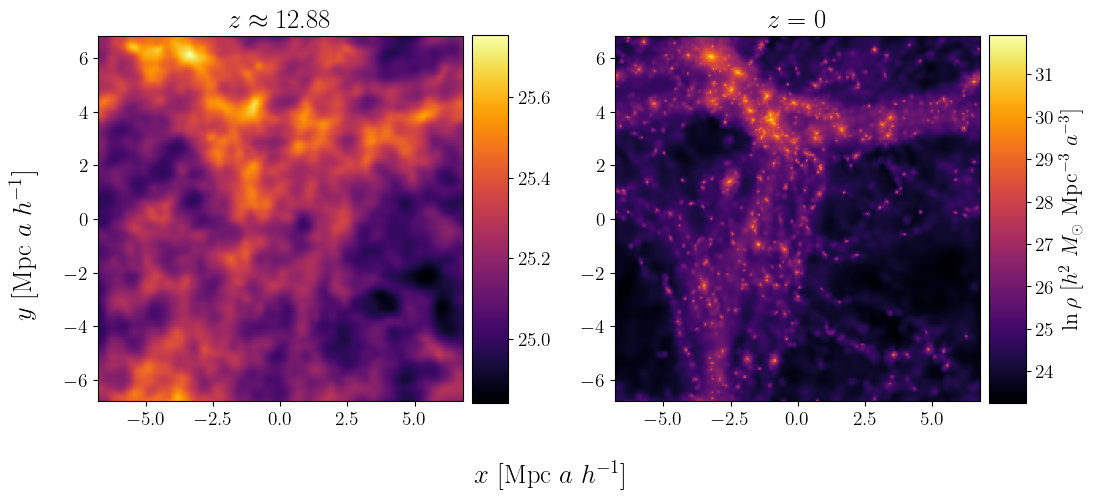

In [233]:
fig, axs = plt.subplots(1, 2, figsize = (11.25, 5))
im_old = axs[0].imshow(np.log(rho_old[::-1]), cmap = "inferno", interpolation = "nearest", extent = [np.min(x_old), np.max(x_old), np.min(y_old), np.max(y_old)])
im = axs[1].imshow(np.log(rho[::-1]), cmap = "inferno", interpolation = "nearest", extent = [np.min(x), np.max(x), np.min(y), np.max(y)])
axs[0].set_title(r"$z\approx\:$" + f"{1/a_old-1:.2f}")
axs[1].set_title(r"$z=0$")
plt.colorbar(im_old, ax = axs[0], pad = 0.02, shrink = 0.92, aspect = 10)
plt.colorbar(im, ax = axs[1], label = r"$\ln\rho$ [" + rho_unit + "]", pad = 0.02, shrink = 0.92, aspect = 10)
fig.supxlabel(r"$x$ [" + box_unit + "]")
fig.supylabel(r"$y$ [" + box_unit + "]")
plt.tight_layout()
plt.savefig("../figs/density_new_and_old.pdf")
plt.show()

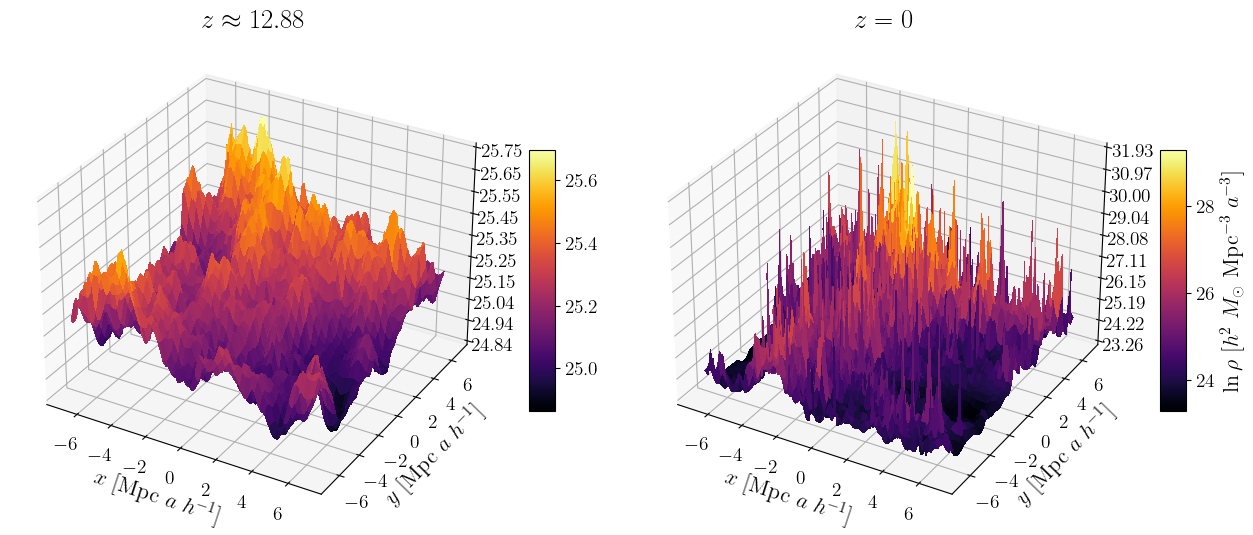

In [240]:
fig = plt.figure(figsize = (13, 7))
axs = [fig.add_subplot(121, projection = "3d"), fig.add_subplot(122, projection = "3d")]

surf_old = axs[0].plot_surface(xx_old, yy_old, np.log(rho_old), cmap = "inferno", linewidth = 0, antialiased = False)
surf = axs[1].plot_surface(xx, yy, np.log(rho), cmap = "inferno", linewidth = 0, antialiased = False)
titles = [r"$z\approx12.88$", r"$z=0$"]
for i in range(2):
    axs[i].zaxis.set_major_locator(LinearLocator(10))
    axs[i].zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
    axs[i].set_xlabel(r"$x$ [" + box_unit + "]")
    axs[i].set_ylabel(r"$y$ [" + box_unit + "]")
    axs[i].set_title(titles[i])
fig.colorbar(surf_old, shrink = 0.4, aspect = 10)
fig.colorbar(surf, shrink = 0.4, aspect = 10, label = r"$\ln\rho$ [" + rho_unit + "]")
plt.tight_layout()
plt.savefig("../figs/density_surf_both.pdf")
plt.show()

In [ ]:
fig = plt.figure(figsize = (13, 11))
axs = [fig.add_subplot(221, projection = "3d"), fig.add_subplot(222, projection = "3d"), fig.add_subplot(223, projection = "3d"), fig.add_subplot(224, projection = "3d")]

surf_old = axs[0].plot_surface(xx_old, yy_old, np.log(rho_old), cmap = "inferno", linewidth = 0, antialiased = False)
surf = axs[1].plot_surface(xx, yy, np.log(rho), cmap = "inferno", linewidth = 0, antialiased = False)
surf_old_sm = axs[2].plot_surface(xx_old, yy_old, np.log(rho_old_sm), cmap = "inferno", linewidth = 0, antialiased = False)
surf_sm = axs[3].plot_surface(xx, yy, np.log(rho_sm), cmap = "inferno", linewidth = 0, antialiased = False)
titles = [r"Raw, $z\approx12.88$", r"Raw, $z=0$", r"Smoothed, $z\approx12.88$", r"Smoothed, $z=0$"]
for i in range(4):
    axs[i].zaxis.set_major_locator(LinearLocator(10))
    axs[i].zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
    axs[i].set_xlabel(r"$x$ [" + box_unit + "]")
    axs[i].set_ylabel(r"$y$ [" + box_unit + "]")
    axs[i].set_title(titles[i])
fig.colorbar(surf_old, shrink = 0.5, aspect = 10)
fig.colorbar(surf, shrink = 0.5, aspect = 10, label = r"$\ln\rho$ [" + rho_unit + "]")
fig.colorbar(surf_old_sm, shrink = 0.5, aspect = 10)
fig.colorbar(surf_sm, shrink = 0.5, aspect = 10, label = r"$\ln\rho$ [" + rho_unit + "]")
plt.tight_layout()
plt.savefig("../figs/density_surf_all.pdf")
plt.show()

### a)

#### $z\approx12.88$

In [671]:
MSE_raw = []
MSE_scaled = []
R2_raw = []
R2_scaled = []
β_raw_list = []
β_scaled_list = []
X_list = []
scaler_X_list = []
scaler_y_list = []

degrees = range(40, 41) #TODO fix
for degree in degrees:
    X = create_X(x_old.reshape(-1, 1), y_old.reshape(-1, 1), n=degree)
    X_list.append(X)
    # X_train, X_test, y_train, y_test = train_test_split(X, np.log(rho_old).reshape(-1, 1), test_size=0.2, random_state=seed)
    X_train, X_test, y_train, y_test = train_test_split(X, np.log(rho_old).reshape(-1, 1), test_size=0.01)

    # Raw
    β_raw = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ y_train
    β_raw_list.append(β_raw)
    y_tilde_raw = X_train @ β_raw 
    y_pred_raw = X_test @ β_raw
    
    #TODO correct to use y_train for MSE and y_test for score?
    MSE_raw.append(MSE(y_train, y_tilde_raw))
    R2_raw.append(R2(y_test, y_pred_raw))
    
    # Scaled
    scaler_X = StandardScaler().fit(X_train)
    scaler_X_list.append(scaler_X)
    X_train_scaled = scaler_X.transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)

    scaler_y = StandardScaler().fit(y_train)
    scaler_y_list.append(scaler_y)
    y_train_scaled = scaler_y.transform(y_train)
    y_test_scaled = scaler_y.transform(y_test)

    β_scaled = np.linalg.pinv(X_train_scaled.T @ X_train_scaled) @ X_train_scaled.T @ y_train_scaled
    β_scaled[0] = 0
    β_scaled_list.append(β_scaled)
    y_tilde_scaled = X_train_scaled @ β_scaled 
    y_pred_scaled = X_test_scaled @ β_scaled
    
    MSE_scaled.append(MSE(y_train_scaled, y_tilde_scaled))
    R2_scaled.append(R2(y_test_scaled, y_pred_scaled))

MSE(R2_raw, R_scaled) = 5.47e+08


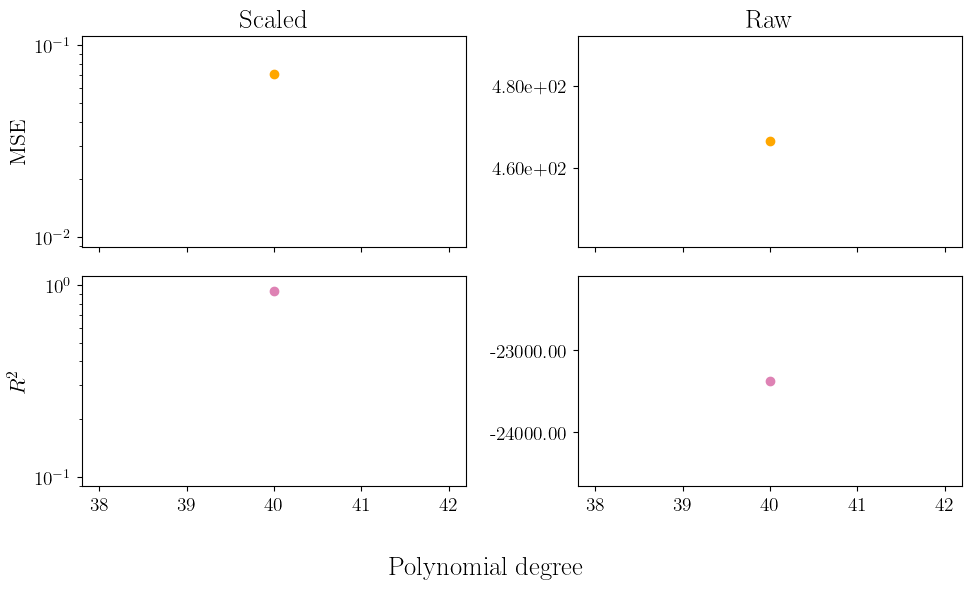

In [672]:
#TODO why weird values for raw?
fig, (ax1, ax2) = plt.subplots(2, 2, sharex=True, figsize = (10, 6))

# Plotting in grid
ax1[0].plot(degrees, MSE_scaled, "--o", color = "#ffa700")
ax1[0].set_title("Scaled")

ax1[1].plot(degrees, MSE_raw, "--o", color = "#ffa700")
ax1[1].set_title("Raw")

ax2[0].plot(degrees, R2_scaled, "--o", color = "#de82b4")
ax2[1].plot(degrees, R2_raw, "--o", color = "#de82b4")

print(f'MSE(R2_raw, R_scaled) = {MSE(np.array(R2_raw), np.array(R2_scaled)):.2e}') # Almost equal

# Prettifying
## Formatting y-labels
ax1[0].yaxis.set_major_formatter(FormatStrFormatter("%.2e"))
ax1[1].yaxis.set_major_formatter(FormatStrFormatter("%.2e"))

ax2[0].yaxis.set_major_formatter(FormatStrFormatter("%.2f%%"))
ax2[1].yaxis.set_major_formatter(FormatStrFormatter("%.2f%%"))

## Axis labels
ax1[0].set_ylabel('MSE')
ax2[0].set_ylabel(r'$R^2$')
ax1[0].set_yscale("log")
ax2[0].set_yscale("log")
fig.supxlabel('Polynomial degree')

# plt.suptitle("Comparing Error in Scaled and Raw Data")
plt.tight_layout()
plt.savefig("../figs/g_error_scaled_vs_raw_old.pdf")
plt.show()

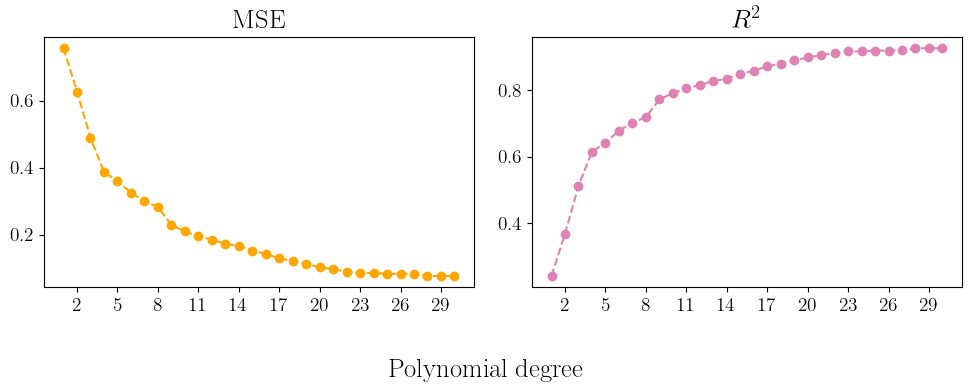

In [664]:
fig, axs = plt.subplots(1, 2, sharex=True, figsize = (10, 4))

# Plotting in grid
axs[0].plot(degrees, MSE_scaled, "--o", color = "#ffa700")
axs[0].set_title("MSE")

axs[1].plot(degrees, R2_scaled, "--o", color = "#de82b4")
axs[1].set_title(r"$R^2$")

# Prettifying
## Formatting y-labels
# axs[0].yaxis.set_major_formatter(FormatStrFormatter("%.2e"))
# axs[1].yaxis.set_major_formatter(FormatStrFormatter("%.2e"))
# axs[0].set_yscale("log")
# axs[1].set_yscale("log")
axs[0].set_xticks(degrees[1::3])
axs[1].set_xticks(degrees[1::3])

fig.supxlabel('Polynomial degree')

# plt.suptitle("Comparing Error in Scaled and Raw Data")
plt.tight_layout()
plt.savefig("../figs/g_error_scaled_vs_raw_old.pdf")
plt.show()

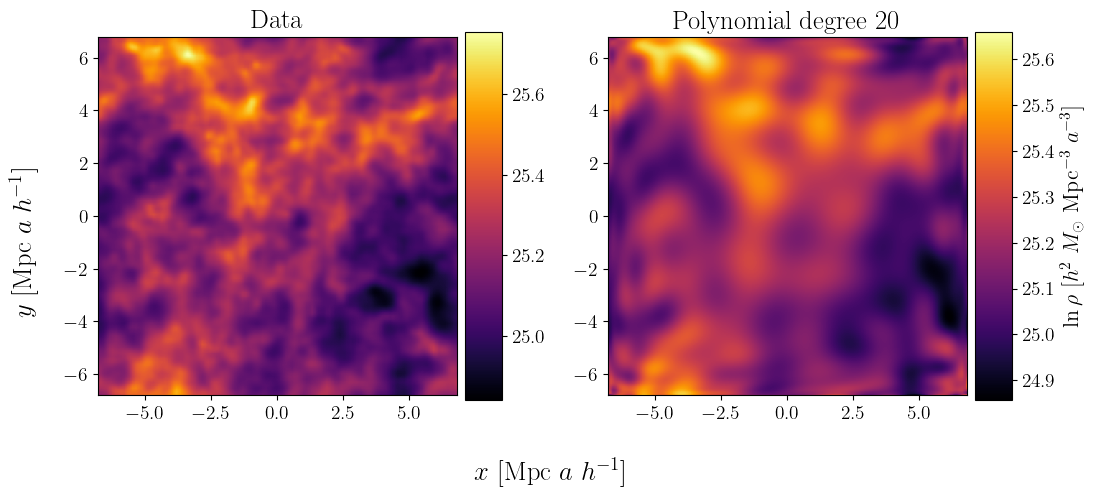

In [673]:
fig, axs = plt.subplots(1, 2, figsize = (11.25, 5))
im = axs[0].imshow(np.log(rho_old[::-1]), cmap = "inferno", interpolation = "nearest", extent = [np.min(x_old), np.max(x_old), np.min(y_old), np.max(y_old)])
im_fit = axs[1].imshow(scaler_y.inverse_transform(scaler_X.transform(X) @ β_scaled).reshape((len(x_old), len(y_old)))[::-1], cmap = "inferno", interpolation = "nearest", extent = [np.min(x), np.max(x), np.min(y), np.max(y)])
axs[0].set_title(r"Data")
axs[1].set_title(r"Polynomial degree 20")
plt.colorbar(im, ax = axs[0], pad = 0.02, shrink = 0.92, aspect = 10)
plt.colorbar(im_fit, ax = axs[1], label = r"$\ln\rho$ [" + rho_unit + "]", pad = 0.02, shrink = 0.92, aspect = 10)
fig.supxlabel(r"$x$ [" + box_unit + "]")
fig.supylabel(r"$y$ [" + box_unit + "]")
plt.tight_layout()
plt.savefig("../figs/density_old_w_20.pdf")
plt.show()

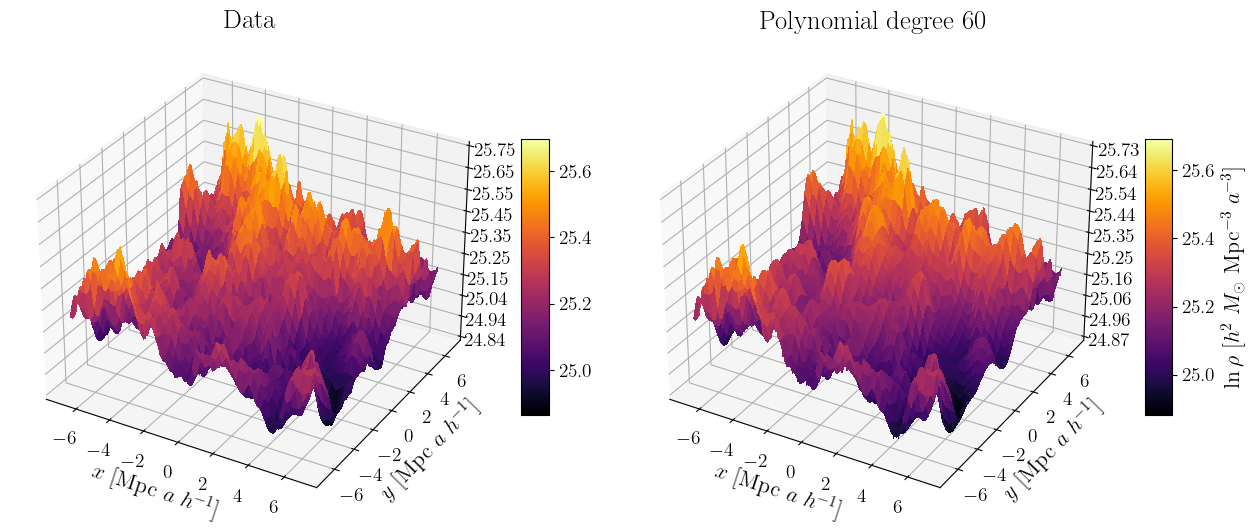

In [ ]:
fig = plt.figure(figsize = (13, 6))
axs = [fig.add_subplot(121, projection = "3d"), fig.add_subplot(122, projection = "3d")]

surf_old = axs[0].plot_surface(xx_old, yy_old, np.log(rho_old), cmap = "inferno", linewidth = 0, antialiased = False)
surf_old_fit = axs[1].plot_surface(xx_old, yy_old, scaler_y.inverse_transform(scaler_X.transform(X) @ β_scaled).reshape((len(x_old), len(y_old))), cmap = "inferno", linewidth = 0, antialiased = False)
titles = [r"Data", r"Polynomial degree 60"]
for i in range(2):
    axs[i].zaxis.set_major_locator(LinearLocator(10))
    axs[i].zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
    axs[i].set_xlabel(r"$x$ [" + box_unit + "]")
    axs[i].set_ylabel(r"$y$ [" + box_unit + "]")
    axs[i].set_title(titles[i])
fig.colorbar(surf_old, shrink = 0.5, aspect = 10)
fig.colorbar(surf_old_fit, shrink = 0.5, aspect = 10, label = r"$\ln\rho$ [" + rho_unit + "]")
plt.tight_layout()
plt.savefig("../figs/density_surf_old_w_60.pdf")
plt.show()

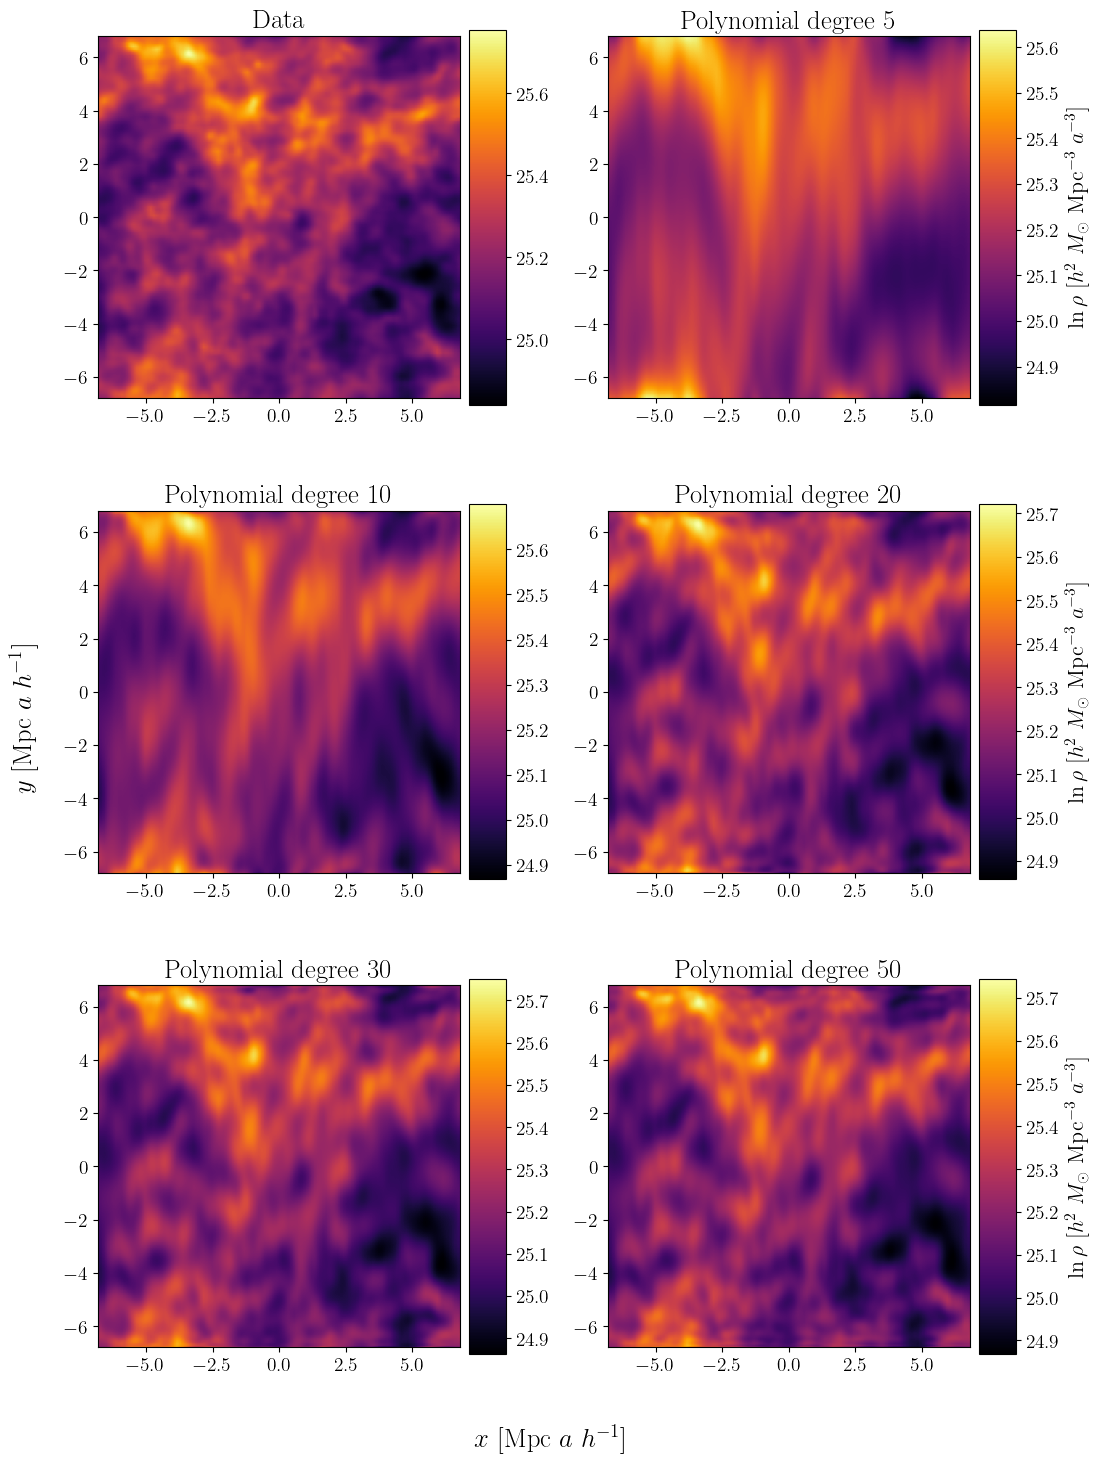

In [289]:
fig, axs = plt.subplots(3, 2, figsize = (11.25, 15))
im = axs[0, 0].imshow(np.log(rho_old[::-1]), cmap = "inferno", interpolation = "nearest", extent = [np.min(x_old), np.max(x_old), np.min(y_old), np.max(y_old)])
im_5 = axs[0, 1].imshow(scaler_y_list[4].inverse_transform(scaler_X_list[4].transform(X_list[4]) @ β_scaled_list[4])[::-1], cmap = "inferno", interpolation = "nearest", extent = [np.min(x_old), np.max(x_old), np.min(y_old), np.max(y_old)])
im_10 = axs[1, 0].imshow(scaler_y_list[9].inverse_transform(scaler_X_list[9].transform(X_list[9]) @ β_scaled_list[9])[::-1], cmap = "inferno", interpolation = "nearest", extent = [np.min(x_old), np.max(x_old), np.min(y_old), np.max(y_old)])
im_20 = axs[1, 1].imshow(scaler_y_list[19].inverse_transform(scaler_X_list[19].transform(X_list[19]) @ β_scaled_list[19])[::-1], cmap = "inferno", interpolation = "nearest", extent = [np.min(x_old), np.max(x_old), np.min(y_old), np.max(y_old)])
im_30 = axs[2, 0].imshow(scaler_y_list[29].inverse_transform(scaler_X_list[29].transform(X_list[29]) @ β_scaled_list[29])[::-1], cmap = "inferno", interpolation = "nearest", extent = [np.min(x_old), np.max(x_old), np.min(y_old), np.max(y_old)])
im_50 = axs[2, 1].imshow(scaler_y_list[49].inverse_transform(scaler_X_list[49].transform(X_list[49]) @ β_scaled_list[49])[::-1], cmap = "inferno", interpolation = "nearest", extent = [np.min(x_old), np.max(x_old), np.min(y_old), np.max(y_old)])
axs[0, 0].set_title(r"Data")
axs[0, 1].set_title(r"Polynomial degree 5")
axs[1, 0].set_title(r"Polynomial degree 10")
axs[1, 1].set_title(r"Polynomial degree 20")
axs[2, 0].set_title(r"Polynomial degree 30")
axs[2, 1].set_title(r"Polynomial degree 50")
plt.colorbar(im, ax = axs[0, 0], pad = 0.02, shrink = 0.92, aspect = 10)
plt.colorbar(im_5, ax = axs[0, 1], label = r"$\ln\rho$ [" + rho_unit + "]", pad = 0.02, shrink = 0.92, aspect = 10)
plt.colorbar(im_10, ax = axs[1, 0], pad = 0.02, shrink = 0.92, aspect = 10)
plt.colorbar(im_20, ax = axs[1, 1], label = r"$\ln\rho$ [" + rho_unit + "]", pad = 0.02, shrink = 0.92, aspect = 10)
plt.colorbar(im_30, ax = axs[2, 0], pad = 0.02, shrink = 0.92, aspect = 10)
plt.colorbar(im_50, ax = axs[2, 1], label = r"$\ln\rho$ [" + rho_unit + "]", pad = 0.02, shrink = 0.92, aspect = 10)
fig.supxlabel(r"$x$ [" + box_unit + "]")
fig.supylabel(r"$y$ [" + box_unit + "]")
plt.tight_layout()
plt.savefig("../figs/density_old_5_10_30.pdf")
plt.show()

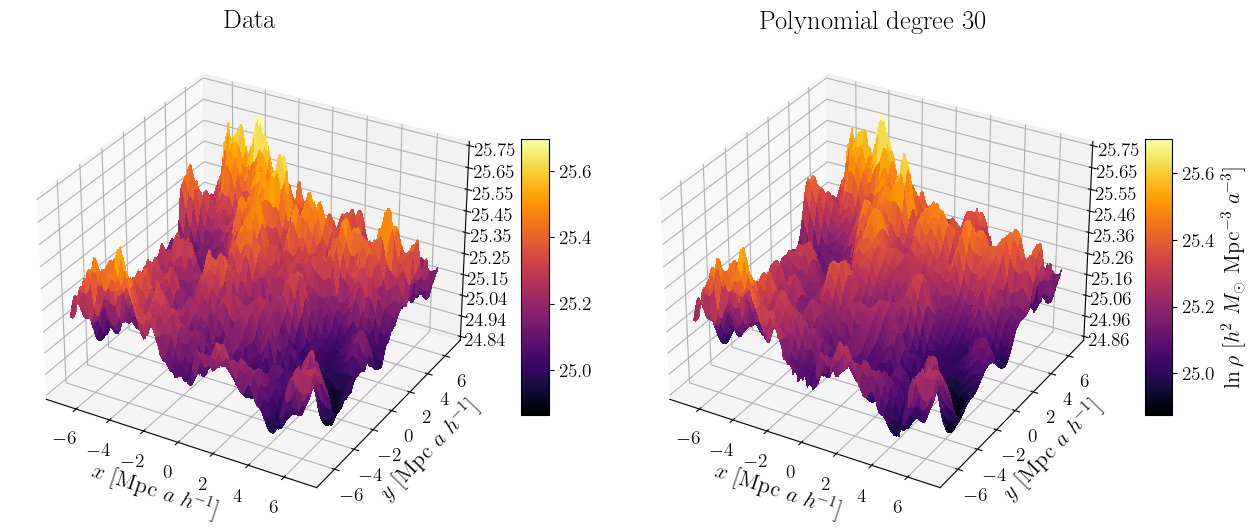

In [290]:
fig = plt.figure(figsize = (13, 6))
axs = [fig.add_subplot(121, projection = "3d"), fig.add_subplot(122, projection = "3d")]

surf_old = axs[0].plot_surface(xx_old, yy_old, np.log(rho_old), cmap = "inferno", linewidth = 0, antialiased = False)
surf_old_fit = axs[1].plot_surface(xx_old, yy_old, scaler_y_list[29].inverse_transform(scaler_X_list[29].transform(X_list[29]) @ β_scaled_list[29]), cmap = "inferno", linewidth = 0, antialiased = False)
titles = [r"Data", r"Polynomial degree 30"]
for i in range(2):
    axs[i].zaxis.set_major_locator(LinearLocator(10))
    axs[i].zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
    axs[i].set_xlabel(r"$x$ [" + box_unit + "]")
    axs[i].set_ylabel(r"$y$ [" + box_unit + "]")
    axs[i].set_title(titles[i])
fig.colorbar(surf_old, shrink = 0.5, aspect = 10)
fig.colorbar(surf_old_fit, shrink = 0.5, aspect = 10, label = r"$\ln\rho$ [" + rho_unit + "]")
plt.tight_layout()
plt.savefig("../figs/density_surf_old_w_30.pdf")
plt.show()

In [714]:
β_scaled_list = []
X_list = []
scaler_X_list = []
scaler_y_list = []

x_list = []
y_list = []
rho_list = []
for i in range(10):
    for j in range(10):
        x_list.append(x_old[i*int(len(x_old)/10):(i+1)*int(len(x_old)/10)])
        y_list.append(y_old[j*int(len(y_old)/10):(j+1)*int(len(y_old)/10)])
        rho_list.append(rho_old[i*int(len(x_old)/10):(i+1)*int(len(x_old)/10), j*int(len(y_old)/10):(j+1)*int(len(y_old)/10)])

degree = 30

for x_, y_, rho_ in zip(x_list, y_list, rho_list):
    X = create_X(x_.reshape(-1, 1), y_.reshape(-1, 1), n = degree)
    X_list.append(X)
    X_train, X_test, y_train, y_test = train_test_split(X, np.log(rho_).reshape(-1, 1), test_size=0.2, random_state=seed)

    # Scaled
    scaler_X = StandardScaler().fit(X_train)
    scaler_X_list.append(scaler_X)
    X_train_scaled = scaler_X.transform(X_train)

    scaler_y = StandardScaler().fit(y_train)
    scaler_y_list.append(scaler_y)
    y_train_scaled = scaler_y.transform(y_train)

    β_scaled = np.linalg.pinv(X_train_scaled.T @ X_train_scaled) @ X_train_scaled.T @ y_train_scaled
    β_scaled[0] = 0
    β_scaled_list.append(β_scaled)

In [732]:
rho_fit = np.zeros((len(x_old), len(y_old)))
idx = 0
for i in range(10):
    for j in range(10):
        rho_fit[i*int(len(x_old)/10):(i+1)*int(len(x_old)/10), j*int(len(y_old)/10):(j+1)*int(len(y_old)/10)] = scaler_y_list[idx].inverse_transform(scaler_X_list[idx].transform(X_list[idx]) @ β_scaled_list[idx]).reshape((len(rho_list[0]), len(rho_list[0][0])))
        idx += 1


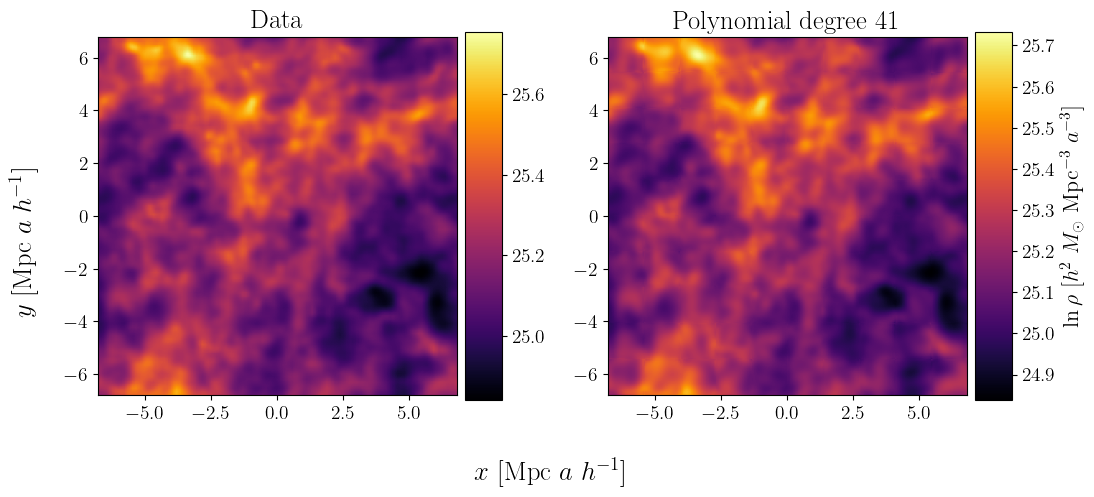

In [734]:
fig, axs = plt.subplots(1, 2, figsize = (11.25, 5))
im = axs[0].imshow(np.log(rho_old[::-1]), cmap = "inferno", interpolation = "nearest", extent = [np.min(x), np.max(x), np.min(y), np.max(y)])
im_fit = axs[1].imshow(rho_fit[::-1], cmap = "inferno", interpolation = "nearest", extent = [np.min(x), np.max(x), np.min(y), np.max(y)])
axs[0].set_title(r"Data")
axs[1].set_title(r"Polynomial degree 41")
plt.colorbar(im, ax = axs[0], pad = 0.02, shrink = 0.92, aspect = 10)
plt.colorbar(im_fit, ax = axs[1], label = r"$\ln\rho$ [" + rho_unit + "]", pad = 0.02, shrink = 0.92, aspect = 10)
fig.supxlabel(r"$x$ [" + box_unit + "]")
fig.supylabel(r"$y$ [" + box_unit + "]")
plt.tight_layout()
# plt.savefig("../figs/density_w_41.pdf")
plt.show()

#### $z=0$

In [699]:
MSE_raw = []
MSE_scaled = []
R2_raw = []
R2_scaled = []
β_raw_list = []
β_scaled_list = []
X_list = []
scaler_X_list = []
scaler_y_list = []

degrees = range(50, 51)
for degree in degrees:
    X = create_X(x, y, n=degree)
    X_list.append(X)
    X_train, X_test, y_train, y_test = train_test_split(X, np.log(rho).reshape(-1, 1), test_size=0.2, random_state=seed)

    # Raw
    β_raw = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ y_train
    β_raw_list.append(β_raw)
    y_tilde_raw = X_train @ β_raw 
    y_pred_raw = X_test @ β_raw
    
    MSE_raw.append(MSE(y_train, y_tilde_raw))
    R2_raw.append(R2(y_test, y_pred_raw))
    
    # Scaled
    scaler_X = StandardScaler().fit(X_train)
    scaler_X_list.append(scaler_X)
    X_train_scaled = scaler_X.transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)

    scaler_y = StandardScaler().fit(y_train)
    scaler_y_list.append(scaler_y)
    y_train_scaled = scaler_y.transform(y_train)
    y_test_scaled = scaler_y.transform(y_test)

    β_scaled = np.linalg.pinv(X_train_scaled.T @ X_train_scaled) @ X_train_scaled.T @ y_train_scaled
    β_scaled[0] = 0
    β_scaled_list.append(β_scaled)
    y_tilde_scaled = X_train_scaled @ β_scaled 
    y_pred_scaled = X_test_scaled @ β_scaled
    
    MSE_scaled.append(MSE(y_train_scaled, y_tilde_scaled))
    R2_scaled.append(R2(y_test_scaled, y_pred_scaled))

MSE(R2_raw, R_scaled) = 2.15e+05


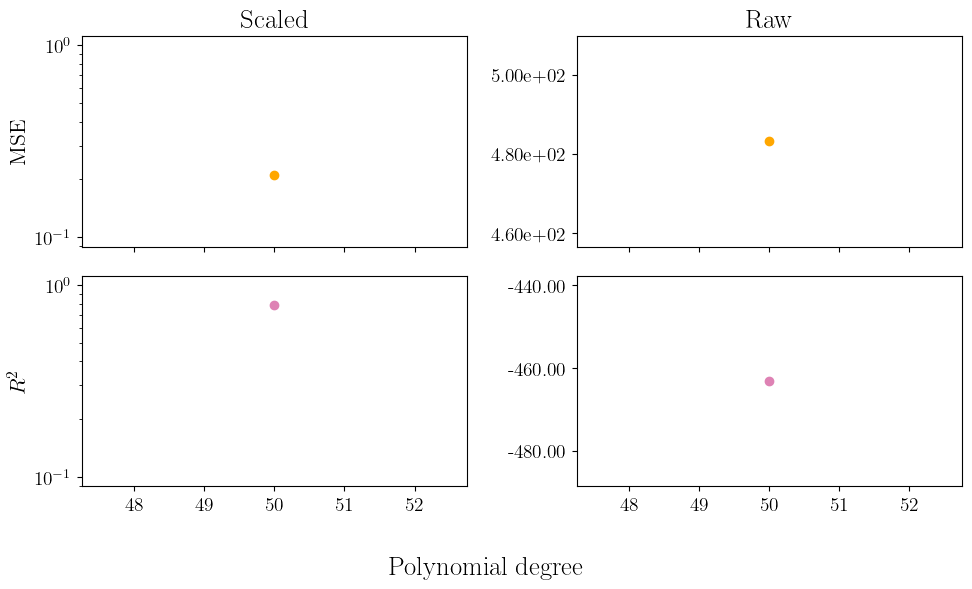

In [700]:
#TODO why weird values for raw?
fig, (ax1, ax2) = plt.subplots(2, 2, sharex=True, figsize = (10, 6))

# Plotting in grid
ax1[0].plot(degrees, MSE_scaled, "--o", color = "#ffa700")
ax1[0].set_title("Scaled")

ax1[1].plot(degrees, MSE_raw, "--o", color = "#ffa700")
ax1[1].set_title("Raw")

ax2[0].plot(degrees, R2_scaled, "--o", color = "#de82b4")
ax2[1].plot(degrees, R2_raw, "--o", color = "#de82b4")

print(f'MSE(R2_raw, R_scaled) = {MSE(np.array(R2_raw), np.array(R2_scaled)):.2e}') # Almost equal

# Prettifying
## Formatting y-labels
ax1[0].yaxis.set_major_formatter(FormatStrFormatter("%.2e"))
ax1[1].yaxis.set_major_formatter(FormatStrFormatter("%.2e"))

ax2[0].yaxis.set_major_formatter(FormatStrFormatter("%.2f%%"))
ax2[1].yaxis.set_major_formatter(FormatStrFormatter("%.2f%%"))

## Axis labels
ax1[0].set_ylabel('MSE')
ax2[0].set_ylabel(r'$R^2$')
ax1[0].set_yscale("log")
ax2[0].set_yscale("log")
fig.supxlabel('Polynomial degree')

# plt.suptitle("Comparing Error in Scaled and Raw Data")
plt.tight_layout()
plt.savefig("../figs/g_error_scaled_vs_raw.pdf")
plt.show()

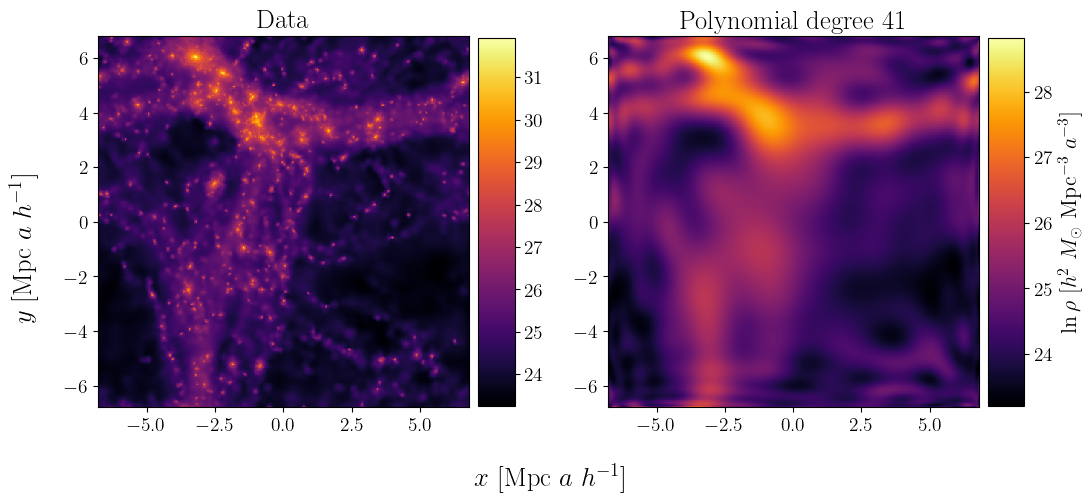

In [701]:
fig, axs = plt.subplots(1, 2, figsize = (11.25, 5))
im = axs[0].imshow(np.log(rho[::-1]), cmap = "inferno", interpolation = "nearest", extent = [np.min(x), np.max(x), np.min(y), np.max(y)])
im_fit = axs[1].imshow(scaler_y.inverse_transform(scaler_X.transform(X) @ β_scaled).reshape((len(x), len(y)))[::-1], cmap = "inferno", interpolation = "nearest", extent = [np.min(x), np.max(x), np.min(y), np.max(y)])
axs[0].set_title(r"Data")
axs[1].set_title(r"Polynomial degree 41")
plt.colorbar(im, ax = axs[0], pad = 0.02, shrink = 0.92, aspect = 10)
plt.colorbar(im_fit, ax = axs[1], label = r"$\ln\rho$ [" + rho_unit + "]", pad = 0.02, shrink = 0.92, aspect = 10)
fig.supxlabel(r"$x$ [" + box_unit + "]")
fig.supylabel(r"$y$ [" + box_unit + "]")
plt.tight_layout()
# plt.savefig("../figs/density_w_41.pdf")
plt.show()

In [692]:
MSE_scaled = []
R2_scaled = []
β_scaled_list = []
X_list = []
scaler_X_list = []
scaler_y_list = []

x_ = x[:int(len(x)/4)]
y_ = y[int(3*len(y)/4):]
rho_ = rho[:int(len(x)/4), int(3*len(y)/4):]
degrees = range(40, 41) #TODO fix
for degree in degrees:
    X = create_X(x_.reshape(-1, 1), y_.reshape(-1, 1), n=degree)
    X_list.append(X)
    X_train, X_test, y_train, y_test = train_test_split(X, np.log(rho_).reshape(-1, 1), test_size=0.2, random_state=seed)
    
    # Scaled
    scaler_X = StandardScaler().fit(X_train)
    scaler_X_list.append(scaler_X)
    X_train_scaled = scaler_X.transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)

    scaler_y = StandardScaler().fit(y_train)
    scaler_y_list.append(scaler_y)
    y_train_scaled = scaler_y.transform(y_train)
    y_test_scaled = scaler_y.transform(y_test)

    β_scaled = np.linalg.pinv(X_train_scaled.T @ X_train_scaled) @ X_train_scaled.T @ y_train_scaled
    β_scaled[0] = 0
    β_scaled_list.append(β_scaled)
    y_tilde_scaled = X_train_scaled @ β_scaled 
    y_pred_scaled = X_test_scaled @ β_scaled
    
    MSE_scaled.append(MSE(y_train_scaled, y_tilde_scaled))
    R2_scaled.append(R2(y_test_scaled, y_pred_scaled))

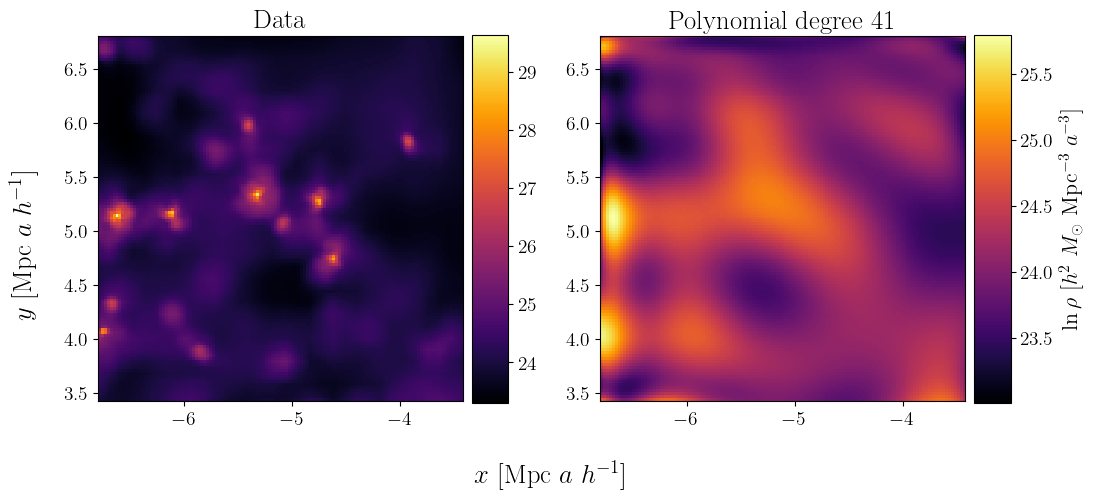

In [693]:
fig, axs = plt.subplots(1, 2, figsize = (11.25, 5))
im = axs[0].imshow(np.log(rho_[::-1]), cmap = "inferno", interpolation = "nearest", extent = [np.min(x_), np.max(x_), np.min(y_), np.max(y_)])
im_fit = axs[1].imshow(scaler_y.inverse_transform(scaler_X.transform(X) @ β_scaled).reshape((len(x_), len(y_)))[::-1], cmap = "inferno", interpolation = "nearest", extent = [np.min(x_), np.max(x_), np.min(y_), np.max(y_)])
axs[0].set_title(r"Data")
axs[1].set_title(r"Polynomial degree 41")
plt.colorbar(im, ax = axs[0], pad = 0.02, shrink = 0.92, aspect = 10)
plt.colorbar(im_fit, ax = axs[1], label = r"$\ln\rho$ [" + rho_unit + "]", pad = 0.02, shrink = 0.92, aspect = 10)
fig.supxlabel(r"$x$ [" + box_unit + "]")
fig.supylabel(r"$y$ [" + box_unit + "]")
plt.tight_layout()
# plt.savefig("../figs/density_w_41.pdf")
plt.show()

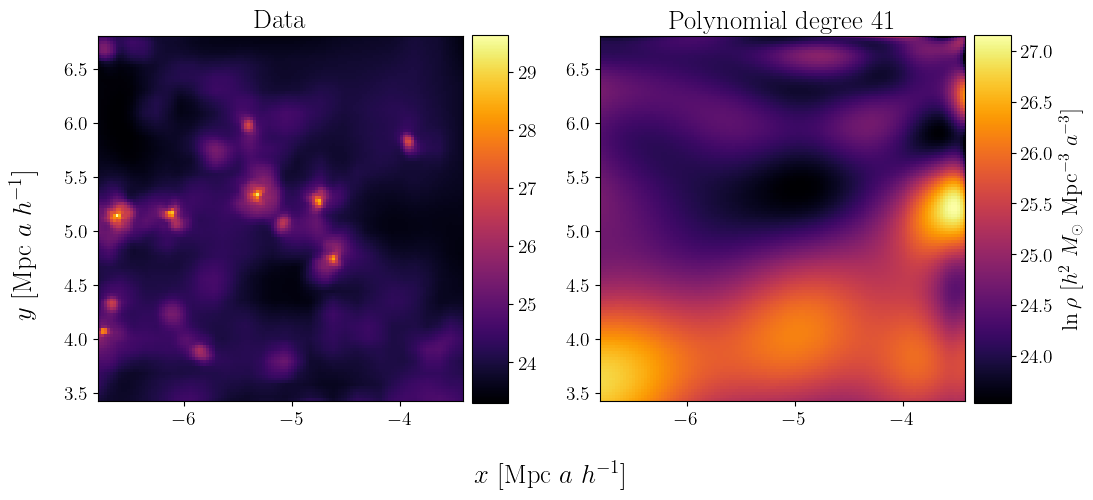

In [698]:
fig, axs = plt.subplots(1, 2, figsize = (11.25, 5))
im = axs[0].imshow(np.log(rho_[::-1]), cmap = "inferno", interpolation = "nearest", extent = [np.min(x_), np.max(x_), np.min(y_), np.max(y_)])
im_fit = axs[1].imshow(scaler_y.inverse_transform(scaler_X.transform(X) @ β_scaled).reshape((len(x), len(y)))[::-1][:int(len(x)/4), int(3*len(y)/4):], cmap = "inferno", interpolation = "nearest", extent = [np.min(x_), np.max(x_), np.min(y_), np.max(y_)])
axs[0].set_title(r"Data")
axs[1].set_title(r"Polynomial degree 41")
plt.colorbar(im, ax = axs[0], pad = 0.02, shrink = 0.92, aspect = 10)
plt.colorbar(im_fit, ax = axs[1], label = r"$\ln\rho$ [" + rho_unit + "]", pad = 0.02, shrink = 0.92, aspect = 10)
fig.supxlabel(r"$x$ [" + box_unit + "]")
fig.supylabel(r"$y$ [" + box_unit + "]")
plt.tight_layout()
# plt.savefig("../figs/density_w_41.pdf")
plt.show()

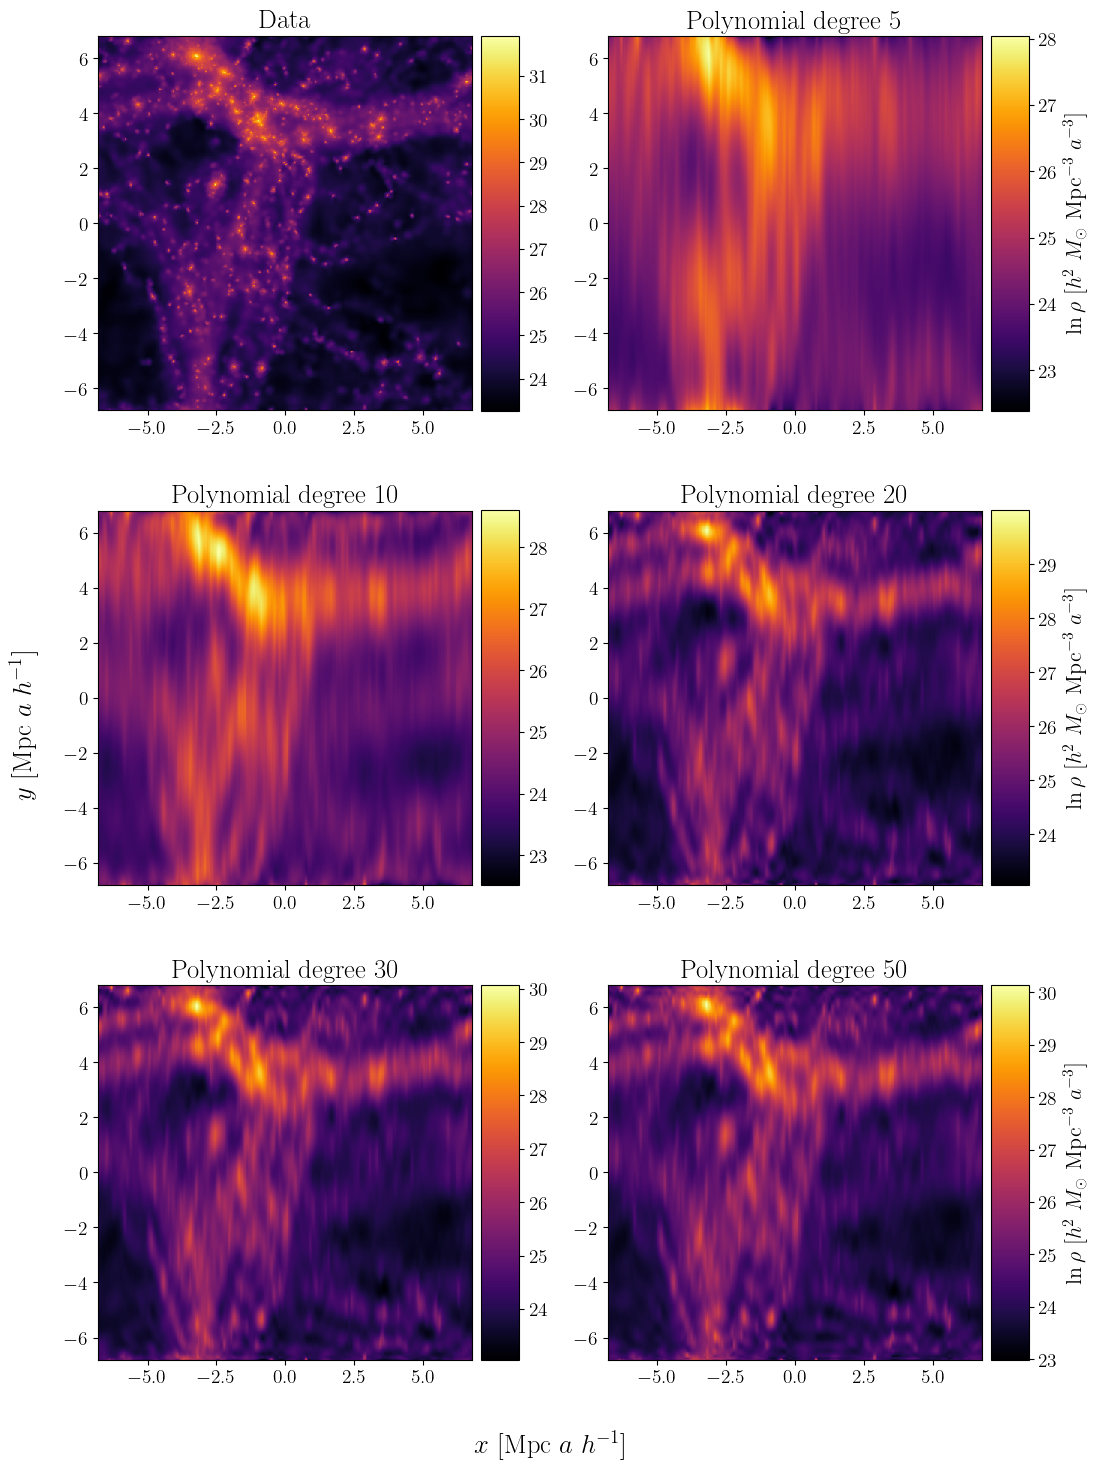

In [297]:
#TODO scaled back correctly? 
# scaler_X_new = StandardScaler().fit(create_X(x, y, n=50))
# scaler_y_new = StandardScaler().fit(np.log(rho))

fig, axs = plt.subplots(3, 2, figsize = (11.25, 15))
im = axs[0, 0].imshow(np.log(rho[::-1]), cmap = "inferno", interpolation = "nearest", extent = [np.min(x), np.max(x), np.min(y), np.max(y)])
im_5 = axs[0, 1].imshow(scaler_y_list[4].inverse_transform(scaler_X_list[4].transform(X_list[4]) @ β_scaled_list[4])[::-1], cmap = "inferno", interpolation = "nearest", extent = [np.min(x), np.max(x), np.min(y), np.max(y)])
im_10 = axs[1, 0].imshow(scaler_y_list[9].inverse_transform(scaler_X_list[9].transform(X_list[9]) @ β_scaled_list[9])[::-1], cmap = "inferno", interpolation = "nearest", extent = [np.min(x), np.max(x), np.min(y), np.max(y)])
im_20 = axs[1, 1].imshow(scaler_y_list[19].inverse_transform(scaler_X_list[19].transform(X_list[19]) @ β_scaled_list[19])[::-1], cmap = "inferno", interpolation = "nearest", extent = [np.min(x), np.max(x), np.min(y), np.max(y)])
im_30 = axs[2, 0].imshow(scaler_y_list[29].inverse_transform(scaler_X_list[29].transform(X_list[29]) @ β_scaled_list[29])[::-1], cmap = "inferno", interpolation = "nearest", extent = [np.min(x), np.max(x), np.min(y), np.max(y)])
im_50 = axs[2, 1].imshow(scaler_y_list[49].inverse_transform(scaler_X_list[49].transform(X_list[49]) @ β_scaled_list[49])[::-1], cmap = "inferno", interpolation = "nearest", extent = [np.min(x), np.max(x), np.min(y), np.max(y)])
axs[0, 0].set_title(r"Data")
axs[0, 1].set_title(r"Polynomial degree 5")
axs[1, 0].set_title(r"Polynomial degree 10")
axs[1, 1].set_title(r"Polynomial degree 20")
axs[2, 0].set_title(r"Polynomial degree 30")
axs[2, 1].set_title(r"Polynomial degree 50")
plt.colorbar(im, ax = axs[0, 0], pad = 0.02, shrink = 0.92, aspect = 10)
plt.colorbar(im_5, ax = axs[0, 1], label = r"$\ln\rho$ [" + rho_unit + "]", pad = 0.02, shrink = 0.92, aspect = 10)
plt.colorbar(im_10, ax = axs[1, 0], pad = 0.02, shrink = 0.92, aspect = 10)
plt.colorbar(im_20, ax = axs[1, 1], label = r"$\ln\rho$ [" + rho_unit + "]", pad = 0.02, shrink = 0.92, aspect = 10)
plt.colorbar(im_30, ax = axs[2, 0], pad = 0.02, shrink = 0.92, aspect = 10)
plt.colorbar(im_50, ax = axs[2, 1], label = r"$\ln\rho$ [" + rho_unit + "]", pad = 0.02, shrink = 0.92, aspect = 10)
fig.supxlabel(r"$x$ [" + box_unit + "]")
fig.supylabel(r"$y$ [" + box_unit + "]")
plt.tight_layout()
plt.savefig("../figs/density_5_10_30.pdf")
plt.show()

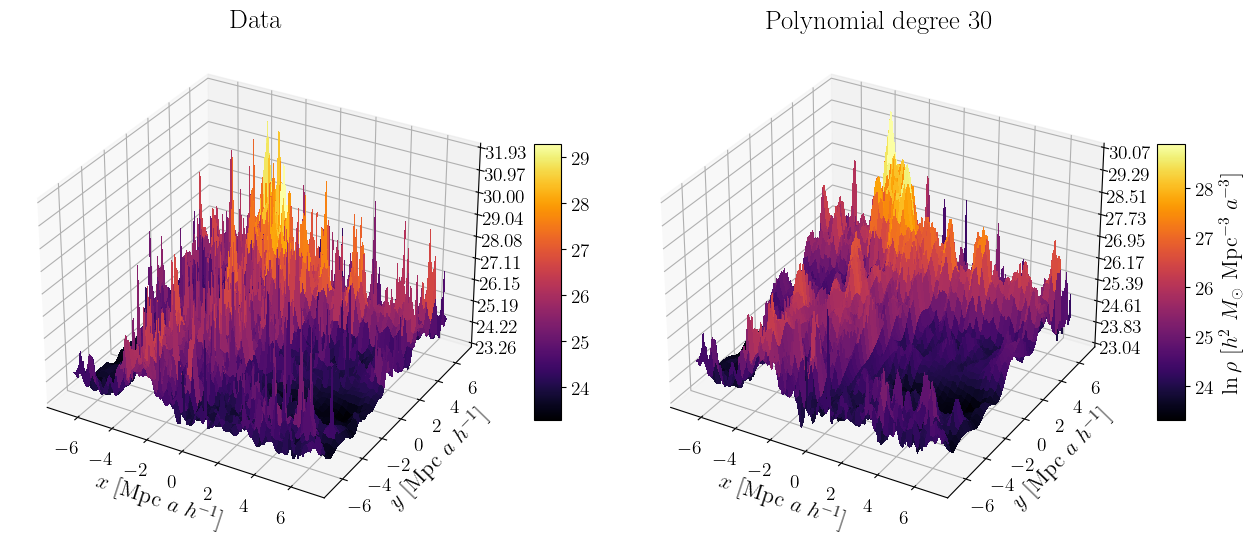

In [294]:
fig = plt.figure(figsize = (13, 6))
axs = [fig.add_subplot(121, projection = "3d"), fig.add_subplot(122, projection = "3d")]

surf = axs[0].plot_surface(xx, yy, np.log(rho), cmap = "inferno", linewidth = 0, antialiased = False)
surf_fit = axs[1].plot_surface(xx, yy, scaler_y_list[29].inverse_transform(scaler_X_list[29].transform(X_list[29]) @ β_scaled_list[29]), cmap = "inferno", linewidth = 0, antialiased = False)
titles = [r"Data", r"Polynomial degree 30"]
for i in range(2):
    axs[i].zaxis.set_major_locator(LinearLocator(10))
    axs[i].zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
    axs[i].set_xlabel(r"$x$ [" + box_unit + "]")
    axs[i].set_ylabel(r"$y$ [" + box_unit + "]")
    axs[i].set_title(titles[i])
fig.colorbar(surf, shrink = 0.5, aspect = 10)
fig.colorbar(surf_fit, shrink = 0.5, aspect = 10, label = r"$\ln\rho$ [" + rho_unit + "]")
plt.tight_layout()
plt.savefig("../figs/density_surf_w_30.pdf")
plt.show()

#### b)

In [2]:
lambdas = [0.001, 0.01, 0.1, 1.0]
degrees = range(1, 11, 2)

MSE_ridge_scaled = np.zeros([len(degrees), len(lambdas)])
R2_ridge_scaled = np.zeros([len(degrees), len(lambdas)])

fig = plt.figure(figsize=(12,16), constrained_layout=True)
subfigs = fig.subfigures(5, 1)

for i in range(len(degrees)):
    X = create_X(x_old, y_old, n=degrees[i])
    X_train, X_test, y_train, y_test = train_test_split(X, np.log(rho_old), test_size=0.2, random_state=seed)
    
    # Scaling the data
    scaler_X = StandardScaler().fit(X_train)
    X_train_scaled = scaler_X.transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)

    scaler_y = StandardScaler().fit(y_train)
    y_train_scaled = scaler_y.transform(y_train)
    y_test_scaled = scaler_y.transform(y_test)

    for j in range(len(lambdas)):
        β_scaled = np.linalg.pinv(X_train_scaled.T @ X_train_scaled + lambdas[j]*np.eye(X_train.shape[1])) @ X_train_scaled.T @ y_train_scaled
        y_tilde_scaled = X_train_scaled @ β_scaled 
        y_pred_scaled = X_test_scaled @ β_scaled
        
        MSE_ridge_scaled[i,j] = MSE(y_train_scaled, y_tilde_scaled)
        R2_ridge_scaled[i,j] = R2(y_test_scaled, y_pred_scaled)

    subfig = subfigs[i]
    axs = subfig.subplots(1, 2)
    axs[0].plot(np.log10(lambdas), MSE_ridge_scaled[i], '--o', color = "#ffa700", label=f'MSE Ridge Polynomial {degrees[i]}')
    axs[1].plot(np.log10(lambdas), R2_ridge_scaled[i], '--o', color = "#de82b4", label=r'$R^2$ ' + f'Ridge Polynomial {degrees[i]}')

    subfig.suptitle(f'Polynomial degree: {degrees[i]}')
    axs[0].yaxis.set_major_formatter(FormatStrFormatter("%.2e"))
    axs[1].yaxis.set_major_formatter(FormatStrFormatter("%.1e%%"))

    axs[0].set_ylabel('MSE')
    axs[1].set_ylabel(r'$R^2$')

    if i != len(degrees) - 1:
        axs[0].set_xticks([])
        axs[1].set_xticks([])

fig.supxlabel(r'$\log_{10}(\lambda)$')
plt.savefig("../figs/g_MSE_R2_Ridge.pdf")
plt.show()

NameError: name 'create_X' is not defined

<Figure size 1200x1600 with 0 Axes>

In [ ]:
#TODO comment
#TODO check that MSE is calculated correctly

#### c)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.674e+01, tolerance: 4.000e-02
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.709e+01, tolerance: 4.000e-02
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

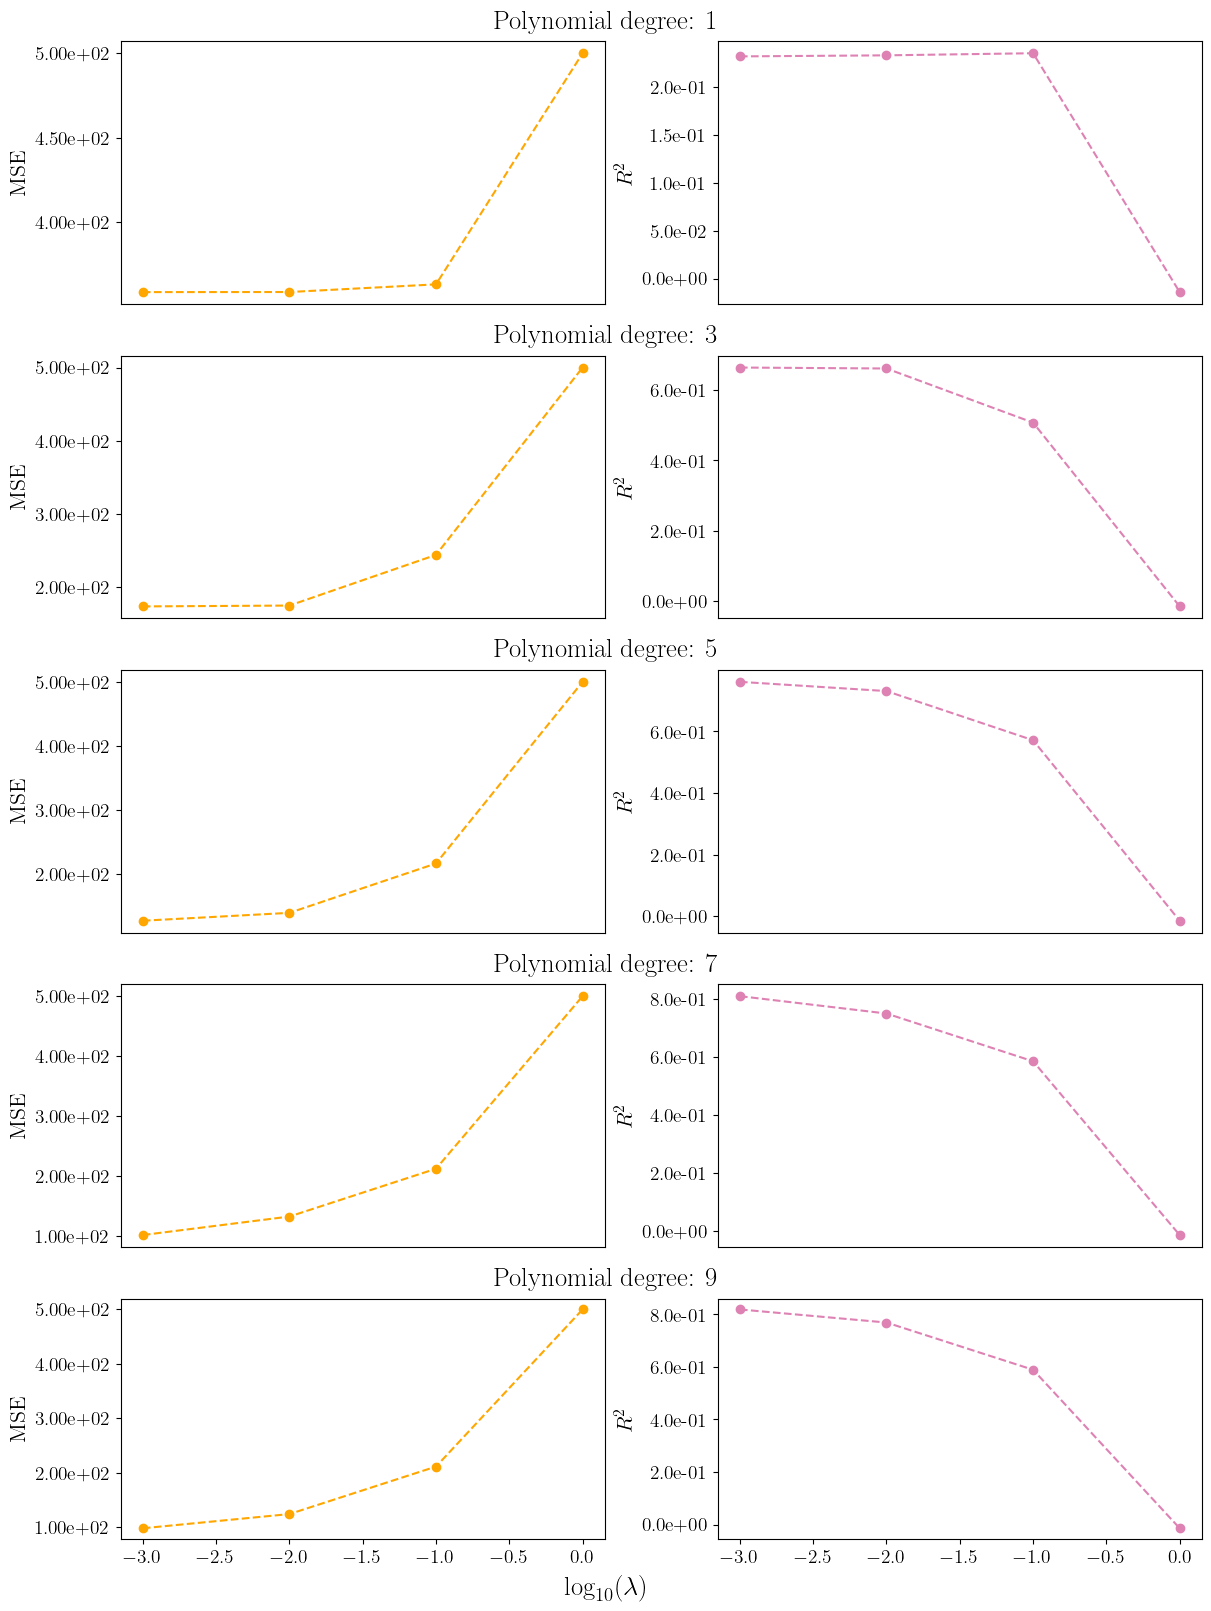

In [36]:
lambdas = [0.001, 0.01, 0.1, 1.0]
degrees = range(1, 11, 2)

MSE_lasso_scaled = np.zeros([len(degrees), len(lambdas)])
R2_lasso_scaled = np.zeros([len(degrees), len(lambdas)])
β_lasso_scaled_list = np.zeros([len(degrees), len(lambdas)])

fig = plt.figure(figsize=(12,16), constrained_layout=True)
subfigs = fig.subfigures(5, 1)

for i in range(len(degrees)):
    X = create_X(x_old, y_old, n=degrees[i])
    X_train, X_test, y_train, y_test = train_test_split(X, np.log(rho_old), test_size=0.2, random_state=seed)
    
    # Scaling the data
    scaler_X = StandardScaler().fit(X_train)
    X_train_scaled = scaler_X.transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)

    scaler_y = StandardScaler().fit(y_train)
    y_train_scaled = scaler_y.transform(y_train)
    y_test_scaled = scaler_y.transform(y_test)

    for j in range(len(lambdas)):
        RegLasso = linear_model.Lasso(lambdas[j], fit_intercept=True)
        RegLasso.fit(X_train_scaled, y_train_scaled)
        y_tilde_lasso = RegLasso.predict(X_train_scaled)
        y_pred_lasso = RegLasso.predict(X_test_scaled)

        MSE_lasso_scaled[i,j] = MSE(y_train_scaled, y_tilde_lasso)
        R2_lasso_scaled[i,j] = R2(y_test_scaled, y_pred_lasso)

    subfig = subfigs[i]
    axs = subfig.subplots(1, 2)
    axs[0].plot(np.log10(lambdas), MSE_lasso_scaled[i], '--o', color = "#ffa700", label=f'MSE Lasso Polynomial {degrees[i]}')
    axs[1].plot(np.log10(lambdas), R2_lasso_scaled[i], '--o', color = "#de82b4", label=r'$R^2$ ' + f'Lasso Polynomial {degrees[i]}')

    subfig.suptitle(f'Polynomial degree: {degrees[i]}')
    axs[0].yaxis.set_major_formatter(FormatStrFormatter("%.2e"))
    axs[1].yaxis.set_major_formatter(FormatStrFormatter("%.1e%%"))

    axs[0].set_ylabel('MSE')
    axs[1].set_ylabel(r'$R^2$')

    if i != len(degrees) - 1:
        axs[0].set_xticks([])
        axs[1].set_xticks([])

fig.supxlabel(r'$\log_{10}(\lambda)$')
plt.savefig("../figs/g_MSE_R2_Lasso.pdf")
plt.show()

In [ ]:
#TODO comment
#TODO check that MSE is calculated correctly

#### e)

#### f)

### Repeating for $z=0$

#### a)

In [27]:
MSE_raw = []
MSE_scaled = []
R2_raw = []
R2_scaled = []
β_raw_list = []
β_scaled_list = []

degrees = range(1, 21)
for degree in degrees:
    X = create_X(x, y, n=degree)
    X_train, X_test, y_train, y_test = train_test_split(X, np.log(rho), test_size=0.2, random_state=seed)

    # Raw
    β_raw = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ y_train
    β_raw_list.append(β_raw)
    y_tilde_raw = X_train @ β_raw 
    y_pred_raw = X_test @ β_raw
    
    #TODO correct to use y_train for MSE and y_test for score?
    MSE_raw.append(MSE(y_train, y_tilde_raw))
    R2_raw.append(R2(y_test, y_pred_raw))
    
    # Scaled
    scaler_X = StandardScaler().fit(X_train)
    X_train_scaled = scaler_X.transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)

    scaler_y = StandardScaler().fit(y_train)
    y_train_scaled = scaler_y.transform(y_train)
    y_test_scaled = scaler_y.transform(y_test)

    β_scaled = np.linalg.pinv(X_train_scaled.T @ X_train_scaled) @ X_train_scaled.T @ y_train_scaled
    β_scaled_list.append(β_scaled)
    y_tilde_scaled = X_train_scaled @ β_scaled 
    y_pred_scaled = X_test_scaled @ β_scaled
    
    MSE_scaled.append(MSE(y_train_scaled, y_tilde_scaled))
    R2_scaled.append(R2(y_test_scaled, y_pred_scaled))

MSE(R2_raw, R_scaled) = 4.01e+04


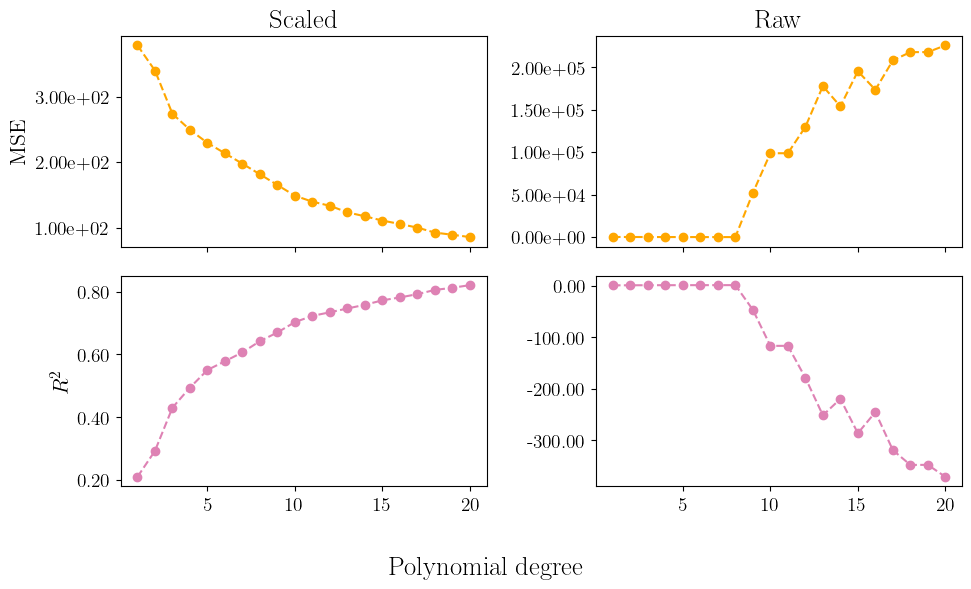

In [28]:
fig, (ax1, ax2) = plt.subplots(2, 2, sharex=True, figsize = (10, 6))

# Plotting in grid
ax1[0].plot(degrees, MSE_scaled, "--o", color = "#ffa700")
ax1[0].set_title("Scaled")

ax1[1].plot(degrees, MSE_raw, "--o", color = "#ffa700")
ax1[1].set_title("Raw")

ax2[0].plot(degrees, R2_scaled, "--o", color = "#de82b4")
ax2[1].plot(degrees, R2_raw, "--o", color = "#de82b4")

print(f'MSE(R2_raw, R_scaled) = {MSE(np.array(R2_raw), np.array(R2_scaled)):.2e}') # Almost equal

# Prettifying
## Formatting y-labels
ax1[0].yaxis.set_major_formatter(FormatStrFormatter("%.2e"))
ax1[1].yaxis.set_major_formatter(FormatStrFormatter("%.2e"))

ax2[0].yaxis.set_major_formatter(FormatStrFormatter("%.2f%%"))
ax2[1].yaxis.set_major_formatter(FormatStrFormatter("%.2f%%"))

## Axis labels
ax1[0].set_ylabel('MSE')
ax2[0].set_ylabel(r'$R^2$')
fig.supxlabel('Polynomial degree')

# plt.suptitle("Comparing Error in Scaled and Raw Data")
plt.tight_layout()
plt.savefig("../figs/g_error_scaled_vs_raw.pdf")
plt.show()

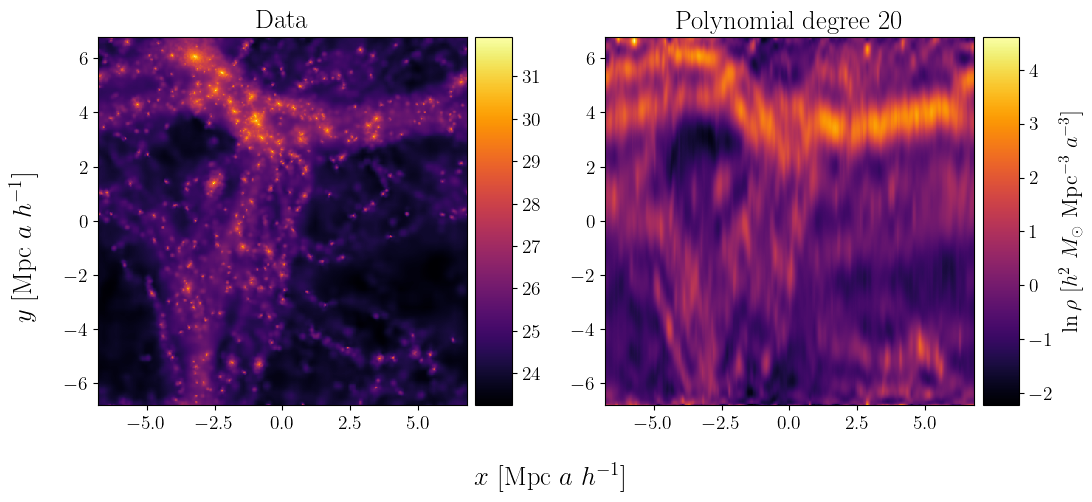

In [29]:
#TODO scale back

fig, axs = plt.subplots(1, 2, figsize = (11.25, 5))
im = axs[0].imshow(np.log(rho[::-1]), cmap = "inferno", interpolation = "nearest", extent = [np.min(x), np.max(x), np.min(y), np.max(y)])
im_fit = axs[1].imshow(scaler_y.inverse_transform(scaler_X.transform(X) @ β_scaled)[::-1], cmap = "inferno", interpolation = "nearest", extent = [np.min(x), np.max(x), np.min(y), np.max(y)])
axs[0].set_title(r"Data")
axs[1].set_title(r"Polynomial degree 20")
plt.colorbar(im, ax = axs[0], pad = 0.02, shrink = 0.92, aspect = 10)
plt.colorbar(im_fit, ax = axs[1], label = r"$\ln\rho$ [" + rho_unit + "]", pad = 0.02, shrink = 0.92, aspect = 10)
fig.supxlabel(r"$x$ [" + box_unit + "]")
fig.supylabel(r"$y$ [" + box_unit + "]")
plt.tight_layout()
plt.savefig("../figs/density_w_20.pdf")
plt.show()

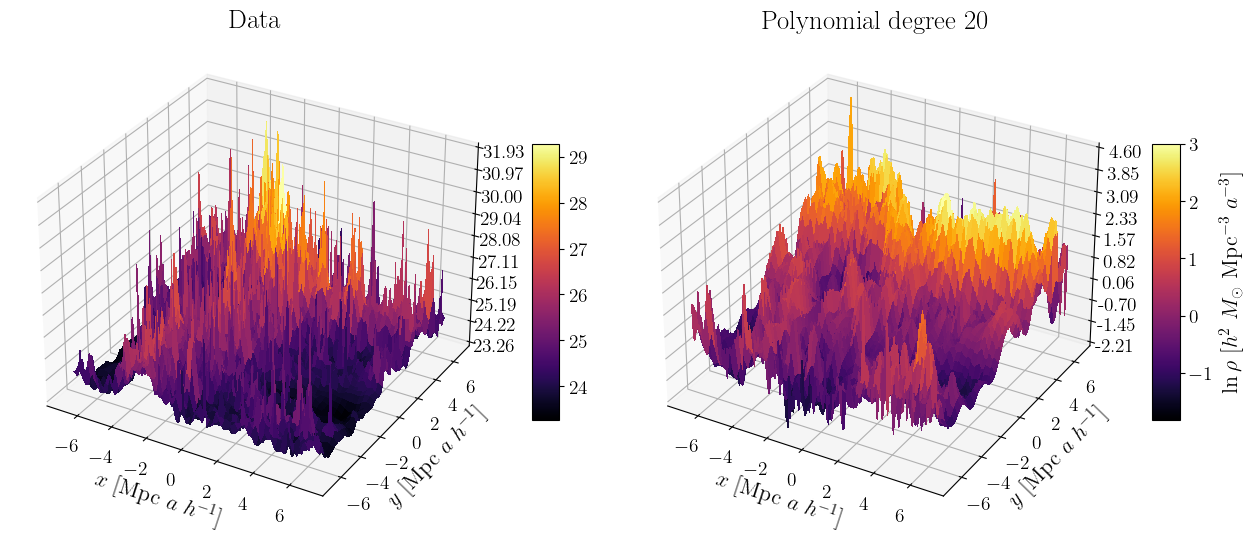

In [31]:
fig = plt.figure(figsize = (13, 6))
axs = [fig.add_subplot(121, projection = "3d"), fig.add_subplot(122, projection = "3d")]

surf = axs[0].plot_surface(xx, yy, np.log(rho), cmap = "inferno", linewidth = 0, antialiased = False)
surf_fit = axs[1].plot_surface(xx, yy, scaler_X.transform(X) @ β_scaled, cmap = "inferno", linewidth = 0, antialiased = False)
titles = [r"Data", r"Polynomial degree 20"]
for i in range(2):
    axs[i].zaxis.set_major_locator(LinearLocator(10))
    axs[i].zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
    axs[i].set_xlabel(r"$x$ [" + box_unit + "]")
    axs[i].set_ylabel(r"$y$ [" + box_unit + "]")
    axs[i].set_title(titles[i])
fig.colorbar(surf, shrink = 0.5, aspect = 10)
fig.colorbar(surf_fit, shrink = 0.5, aspect = 10, label = r"$\ln\rho$ [" + rho_unit + "]")
plt.tight_layout()
plt.savefig("../figs/density_surf_w_20.pdf")
plt.show()

In [ ]:
#TODO plot fit
#TODO merge from main, use functions instead
#TODO crop out parts of data?